<a href="https://colab.research.google.com/github/Bortak10/POSI/blob/main/Tutorial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6

## Introduction

### What is a perceptron?

A **perceptron** is the simplest model of an artificial neuron — the basic building block of neural networks.  
It was proposed by **Frank Rosenblatt** in 1958.

Its purpose is **linear classification** — that is, separating data using a line (in 2D), a plane (in 3D), or a hyperplane (in a multidimensional space).


### Mathematical formula of the perceptron

A perceptron takes an **input vector** and **computes an output** according to the following formula:

$$
y = f(\mathbf{w} \cdot \mathbf{x} + b)
$$

Where:
- $ \mathbf{x} = [x_1, x_2, \dots, x_n] $ — input vector,  
- $ \mathbf{w} = [w_1, w_2, \dots, w_n] $ — weight vector,  
- $ \mathbf{w} \cdot \mathbf{x} = \sum_{i=1}^{n}{w_ix_i} $ — dot product,  
- $ b $ — bias (offset),  
- $ f(\cdot) $ — activation function (e.g., step function).

For the Rosenblatt perceptron, the activation function is:

$$
f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$


### Equivalent form with bias as an additional weight

Equivalently, since:

$$
\mathbf{w} \cdot \mathbf{x} + b = (\mathbf{w}, b) \cdot (\mathbf{x}, 1),
$$

we can treat the term $ b $ as an additional weight $ w_{m+1} $,  
and add an extra coordinate equal to $ 1 $ to each input vector $ \mathbf{x} $.

Then the perceptron equation can be written as:

$$
y = f(\tilde{\mathbf{w}} \cdot \tilde{\mathbf{x}}),
$$

where:

$$
\tilde{\mathbf{w}} = [w_1, w_2, \dots, w_m, b], \quad
\tilde{\mathbf{x}} = [x_1, x_2, \dots, x_m, 1].
$$

This form means that the perceptron can be regarded as a **linear classifier passing through the origin of the coordinate system** (since the bias has been incorporated into the weight space).


### Example of perceptron calculation

Let’s assume we have the following input data:

$$ \mathbf{x} = [0.6, 0.3], \mathbf{w} = [0.4, 0.7] $$

$$
\begin{aligned}
x_1 &= 0.6, \\
x_2 &= 0.3, \\
w_1 &= 0.4, \\
w_2 &= 0.7, \\
b &= -0.5
\end{aligned}
$$

#### Step 1. Compute the weighted sum

$$
z = w_1 x_1 + w_2 x_2 + b
$$

$$
z = (0.4)(0.6) + (0.7)(0.3) - 0.5 = 0.24 + 0.21 - 0.5 = -0.05
$$

#### Step 2. Apply the activation function

$$
y = f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$

Since $z = -0.05 < 0$, therefore:

$$
\boxed{y = 0}
$$

<br><br>

### Example when the bias is added as an additional weight

$$ \mathbf{x} = [0.6, 0.3, 1], \mathbf{w} = [0.4, 0.7, -0.5] $$

$$
\begin{aligned}
x_1 &= 0.6, \\
x_2 &= 0.3, \\
x_3 &= 1, \\
w_1 &= 0.4, \\
w_2 &= 0.7, \\
w_3 &= -0.5
\end{aligned}
$$

#### Step 1. Compute the weighted sum

$$
z = w_1 x_1 + w_2 x_2 + w_3 x_3
$$

$$
z = (0.4)(0.6) + (0.7)(0.3) + (-0.5)(1) = 0.24 + 0.21 - 0.5 = -0.05
$$

#### Step 2. Apply the activation function

$$
y = f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$

Since $z = -0.05 < 0$, therefore:

$$
\boxed{y = 0}
$$


### Weight update (perceptron learning)

If the perceptron makes an error (i.e., its output $ y \neq \hat{y} $, where $ y $ is the true label and $\hat{y}$ is the predicted value), the weights are updated according to the rule:

$$
\hat{\mathbf{w}} = \mathbf{w} + \eta \times (y - \hat{y}) \times \mathbf{x}
$$

$$
w_i^{(new)} = w_i^{(old)} + \eta (y - \hat{y}) x_i
$$

$$
b^{(new)} = b^{(old)} + \eta (y - \hat{y})
$$

Where $ \eta $ is the learning rate.

If the perceptron **classifies a sample correctly** ($y = \hat{y}$), then $y - \hat{y} = 0$, so **the weights do not change**.  
If the perceptron **makes an error**, the weights are **adjusted in the direction** of the input vector $\mathbf{x}$ to increase the chance of correct classification next time.


### Example of perceptron training for the AND gate

| A | B | Y |
|:-:|:-:|:----------:|
| 0 | 0 |     0      |
| 0 | 1 |     0      |
| 1 | 0 |     0      |
| 1 | 1 |     1      |


$
\mathbf{w} = [0.4, 0.4]
$

$
\mathbf{b} = 0.7
$

<br>

Adding the bias to the weight vector:

$\tilde{\mathbf{w}} = [0.4, 0.4, 0.7]$

Perceptron equation:

$
y = f(\tilde{\mathbf{w}} \cdot \tilde{\mathbf{x}})
$

Activation function:

$
f(z) =
\begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$

Weight update rule:

$ \hat{\mathbf{w}} = \mathbf{w} + \eta \times (y - \hat{y}) \times \mathbf{x} $


#### Epoch 1

$I.$ For $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.4, 0.7] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 0 + 0.4 \times 0 + 0.7 \times 1 = 0.7$

$ y = f(0.7) = 1 $

<br>

Error, because $y = 0$ and $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

New weights:

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.7] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.7] + [0, 0, -0.1] = [0.4, 0.4, 0.6] $

<br><br>

$II.$ For $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.4, 0.6] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 0 + 0.4 \times 1 + 0.6 \times 1 = 1 $

$ y = f(1) = 1 $

<br>

Error, because $y = 0$ and $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

New weights:

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.6] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.4, 0.6] + [0, -0.1, -0.1] = [0.4, 0.3, 0.5] $

<br><br>

$III.$ For $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.4, 0.3, 0.5] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.4 \times 1 + 0.3 \times 0 + 0.5 \times 1 = 0.4 + 0.5 = 0.9 $

$ y = f(0.9) = 1 $

<br>

Error, because $y = 0$ and $\hat{y} = 1$

$y - \hat{y} = -1$

<br>

New weights:

$ \hat{\mathbf{w}} = [0.4, 0.3, 0.5] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.4, 0.3, 0.5] + [-0.1, 0, -0.1] = [0.3, 0.3, 0.4] $

<br><br>

$IV.$ For $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.4] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 1 + 0.3 \times 1 + 0.4 \times 1 = 0.3 + 0.3 + 0.4 = 1 $

$ y = f(1) = 1 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$


#### Epoch 2

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.4] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 0 + 0.3 \times 0 + 0.4 \times 1 = 0.4$

$ y = f(0.4) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.4] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.4] + [0, 0, -0.1] = [0.3, 0.3, 0.3] $

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.3, 0.3] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 0 + 0.3 \times 1 + 0.3 \times 1 = 0.6 $

$ y = f(0.6) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$


<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.3] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.3, 0.3] + [0, -0.1, -0.1] = [0.3, 0.2, 0.2] $

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.3, 0.2, 0.2] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.3 \times 1 + 0.2 \times 0 + 0.2 \times 1 = 0.3 + 0.2 = 0.5 $

$ y = f(0.5) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.3, 0.2, 0.2] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.3, 0.2, 0.2] + [-0.1, 0, -0.1] = [0.2, 0.2, 0.1] $

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.1] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 1 + 0.2 \times 1 + 0.1 \times 1 = 0.2 + 0.2 + 0.1 = 0.5 $

$ y = f(0.5) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$


#### Epoka 3

$I.$ Dla $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.1] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 0 + 0.2 \times 0 + 0.1 \times 1 = 0.1$

$ y = f(0.1) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.1] + 0.1 \times (0 - 1) \times [0, 0, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.1] + [0, 0, -0.1] = [0.2, 0.2, 0.0] $

<br><br>

$II.$ Dla $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.2, 0.0] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 0 + 0.2 \times 1 + 0.0 \times 1 = 0.2 $

$ y = f(0.2) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$


<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.0] + 0.1 \times (0 - 1) \times [0, 1, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.2, 0.0] + [0, -0.1, -0.1] = [0.2, 0.1, -0.1] $

<br><br>

$III.$ Dla $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.2, 0.1, -0.1] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.2 \times 1 + 0.1 \times 0 + (-0.1) \times 1 = 0.2 - 0.1 = 0.1 $

$ y = f(0.1) = 1 $

<br>

Błąd, ponieważ $y = 0$, a $\hat{y} = 1$

<br>

Nowe wagi:

$ \hat{\mathbf{w}} = [0.2, 0.1, -0.1] + 0.1 \times (0 - 1) \times [1, 0, 1] $

$ \hat{\mathbf{w}} = [0.2, 0.1, -0.1] + [-0.1, 0, -0.1] = [0.1, 0.1, -0.2] $

<br><br>

$IV.$ Dla $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 1 + (-0.2) \times 1 = 0.1 + 0.1 - 0.2 = 0 $

$ y = f(0) = 1 $

<br>

Poprawny wynik, ponieważ $y = 1$, a $\hat{y} = 1$


#### Epoch 4

$I.$ For $A = 0$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [0, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 0 + 0.1 \times 0 + (-0.2) \times 1 = -0.2$

$ y = f(-0.2) = 0 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

$II.$ For $A = 0$, $B = 1$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [0, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 0 + 0.1 \times 1 + (-0.2) \times 1 = -0.1 $

$ y = f(-0.1) = 0 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

$III.$ For $A = 1$, $B = 0$, $Y = 0$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 0, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 0 + (-0.2) \times 1 = 0.1 - 0.2 = -0.1$

$ y = f(-0.1) = 0 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

$IV.$ For $A = 1$, $B = 1$, $Y = 1$:

$\mathbf{w} \cdot \mathbf{x} = [0.1, 0.1, -0.2] \cdot [1, 1, 1]$

$\mathbf{w} \cdot \mathbf{x} = 0.1 \times 1 + 0.1 \times 1 + (-0.2) \times 1 = 0.1 + 0.1 - 0.2 = 0 $

$ y = f(0) = 1 $

<br>

Correct result, because $y = 1$ and $\hat{y} = 1$

<br><br>

## In this epoch, the perceptron outputs correct results | End of training

### Example of using a Perceptron in Python code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

df = pd.DataFrame(X, columns = ['feature_1', 'feature_2'])
df['target'] = y

X = df[['feature_1', 'feature_2']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Dokładność: 0.975


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


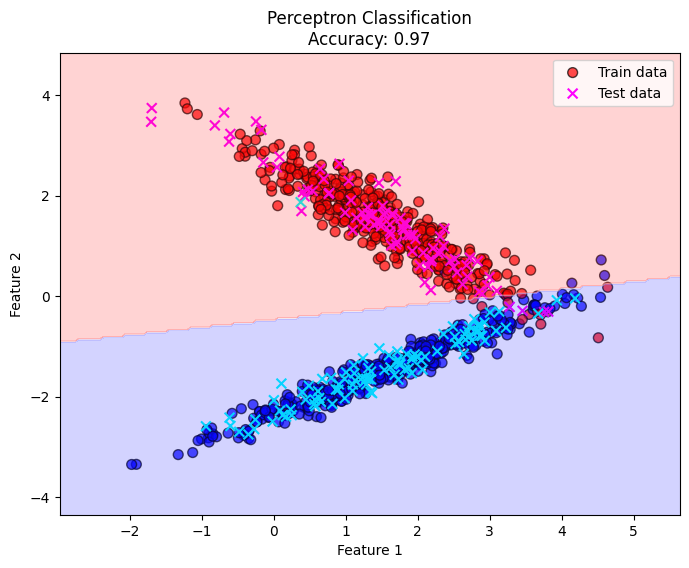

In [ ]:
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(X_train['feature_1'], X_train['feature_2'], c=y_train, cmap='bwr', edgecolor='k', s=50, alpha=0.7)
plt.scatter(X_test['feature_1'], X_test['feature_2'], c=y_test, cmap='cool', marker='x', s=50, label='Test data')

x_min, x_max = X['feature_1'].min() - 1, X['feature_1'].max() + 1
y_min, y_max = X['feature_2'].min() - 1, X['feature_2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Perceptron Classification\nAccuracy: {accuracy:.2f}')
plt.legend(['Train data','Test data'])
plt.show()


### Perceptron Summary

The perceptron:
- computes the **weighted sum of inputs**,  
- applies an **activation function (usually a step function)**,  
- can **learn** by updating its weights,  
- works only for **linearly separable** data.

## Exercises

### Exercise 1
Train a perceptron for the OR gate
| A | B | Y = A ∨ B |
|:-:|:-:|:----------:|
| 0 | 0 |     0      |
| 0 | 1 |     1      |
| 1 | 0 |     1      |
| 1 | 1 |     1      |


$
\mathbf{w} = [0.7, 0.6]
$

$
\mathbf{b} = -1.4
$

Epoch 1

1. For 𝐴=0, 𝐵=0, 𝑌=0:

𝐰⋅𝐱 =[0.7,0.6,-1.4]⋅[0,0,1]

𝐰⋅𝐱 = 0.7 × 0 + 0.6 × 0 - 1.4 × 1 = -1.4

𝑦 = 𝑓(-1.4) = 0


Correct result, because 𝑦=0 and  𝑦̂ =0


2. For A=0, B=1, Y=1:

𝐰⋅𝐱 =[0.7,0.6,-1.4]⋅[0,1,1]

𝐰⋅𝐱 = 0.7 × 0 + 0.6 × 1 - 1.4 × 1 = -0.8

𝑦 = 𝑓(-0.8) = 0

Error, because  𝑦=1  and  𝑦̂ =0

𝑦−𝑦̂ = 1


New weights:

𝐰̂ =[0.7,0.6,-1.4]+0.1×(1-0)×[0,1,1]

𝐰̂ =[0.7,0.6,-1.4]+[0,0.1,0.1]=[0.7,0.7,-1.3]

3. For A=1, B=0, Y=1:

𝐰⋅𝐱 =[0.7,0.7,-1.3]⋅[1,0,1]

𝐰⋅𝐱 = 0.7 × 1 + 0.6 × 0 - 1.3 × 1 = -0.6

𝑦 = 𝑓(-0.6) = 0

Error, because  𝑦=1  and  𝑦̂ =0

𝑦−𝑦̂ = 1

New weights:

𝐰̂ =[0.7,0.7,-1.3]+0.1×(1-0)×[1,0,1]

𝐰̂ =[0.7,0.7,-1.3]+[0.1,0,0.1]=[0.8,0.7,-1.2]


4. For A=1, B=1, Y=1:

𝐰⋅𝐱 =[0.8,0.7,-1.2]⋅[1,1,1]

𝐰⋅𝐱 = 0.7 × 1 + 0.6 × 1 - 1.2 × 1 = 0.1

𝑦 = 𝑓(0.1) = 1

Correct result, because 𝑦 = 1 and  𝑦̂ = 1


Epoch 2

1. For 𝐴=0, 𝐵=0, 𝑌=0:

𝐰⋅𝐱 =[0.8,0.7,-1.2]⋅[0,0,1]

𝐰⋅𝐱 = 0.8 × 0 + 0.7 × 0 - 1.2 × 1 = -1.2

𝑦 = 𝑓(-1.2) = 0


Correct result, because 𝑦=0 and  𝑦̂ =0


2. For A=0, B=1, Y=1:

𝐰⋅𝐱 =[0.8,0.7,-1.2]⋅[0,1,1]

𝐰⋅𝐱 = 0.8 × 0 + 0.7 × 1 - 1.2 × 1 = -0.5

𝑦 = 𝑓(-0.5) = 0

Error, because  𝑦=1  and  𝑦̂ =0

𝑦−𝑦̂ = 1


New weights:

𝐰̂ =[0.8,0.7,-1.2]+0.1×(1-0)×[0,1,1]

𝐰̂ =[0.8,0.7,-1.2]+[0,0.1,0.1]=[0.8,0.8,-1.1]



3. For A=1, B=0, Y=1:

𝐰⋅𝐱 =[0.8,0.8,-1.1]⋅[1,0,1]

𝐰⋅𝐱 = 0.8 × 1 + 0.8 × 0 - 1.1 × 1 = -0.3

𝑦 = 𝑓(-0.3) = 0

Error, because  𝑦=1  and  𝑦̂ =0

𝑦−𝑦̂ = 1

New weights:

𝐰̂ =[0.8,0.8,-1.1]+0.1×(1-0)×[1,0,1]

𝐰̂ =[0.8,0.8,-1.1]+[0.1,0,0.1]=[0.9,0.8,-1]




4. For A=1, B=1, Y=1:

𝐰⋅𝐱 =[0.9,0.8,-1]⋅[1,1,1]

𝐰⋅𝐱 = 0.9 × 1 + 0.8 × 1 - 1 × 1 = 0.7

𝑦 = 𝑓(0.7) = 1

Correct result, because 𝑦 = 1 and  𝑦̂ = 1



Epoch 3


1. For 𝐴=0, 𝐵=0, 𝑌=0:

𝐰⋅𝐱 =[0.9,0.8,-1]⋅[0,0,1]

𝐰⋅𝐱 = 0.9 × 0 + 0.8 × 0 - 1 × 1 = -1

𝑦 = 𝑓(-1) = 0


Correct result, because 𝑦=0 and  𝑦̂ =0


2. For A=0, B=1, Y=1:

𝐰⋅𝐱 =[0.9,0.8,-1]⋅[0,1,1]

𝐰⋅𝐱 = 0.9 × 0 + 0.8 × 1 - 1 × 1 = -0.2

𝑦 = 𝑓(-0.2) = 0

Error, because  𝑦=1  and  𝑦̂ =0

𝑦−𝑦̂ = 1


New weights:

𝐰̂ =[0.9,0.8,-1]+0.1×(1-0)×[0,1,1]

𝐰̂ =[0.9,0.8,-1]+[0,0.1,0.1]=[0.9,0.9,-0.9]



3. For A=1, B=0, Y=1:

𝐰⋅𝐱 =[0.9,0.9,-0.9]⋅[1,0,1]

𝐰⋅𝐱 = 0.9 × 1 + 0.9 × 0 - 0.9 × 1 = 0

𝑦 = 𝑓(0) = 1

Correct result, because 𝑦=1 and  𝑦̂ =1


4. For A=1, B=1, Y=1:

𝐰⋅𝐱 =[0.9,0.9,-0.9]⋅[1,1,1]

𝐰⋅𝐱 = 0.9 × 1 + 0.9 × 1 - 0.9 × 1 = 0.9

𝑦 = 𝑓(0.9) = 1

Correct result, because 𝑦 = 1 and  𝑦̂ = 1


Epoch 4


1. For 𝐴=0, 𝐵=0, 𝑌=0:

𝐰⋅𝐱 =[0.9,0.9,-0.9]⋅[0,0,1]

𝐰⋅𝐱 = 0.9 × 0 + 0.9 × 0 - 0.9 × 1 = -0.9

𝑦 = 𝑓(-0.9) = 0


Correct result, because 𝑦=0 and  𝑦̂ =0


2. For A=0, B=1, Y=1:

𝐰⋅𝐱 =[0.9,0.9,-0.9]⋅[0,1,1]

𝐰⋅𝐱 = 0.9 × 0 + 0.9 × 1 - 0.9 × 1 = 0

𝑦 = 𝑓(0) = 1

Correct result, because 𝑦 = 1 and  𝑦̂ = 1


3. For A=1, B=0, Y=1:

𝐰⋅𝐱 =[0.9,0.9,-0.9]⋅[1,0,1]

𝐰⋅𝐱 = 0.9 × 1 + 0.9 × 0 - 0.9 × 1 = 0

𝑦 = 𝑓(0) = 1

Correct result, because 𝑦=1 and  𝑦̂ =1


4. For A=1, B=1, Y=1:

𝐰⋅𝐱 =[0.9,0.9,-0.9]⋅[1,1,1]

𝐰⋅𝐱 = 0.9 × 1 + 0.9 × 1 - 0.9 × 1 = 0.9

𝑦 = 𝑓(0.9) = 1

Correct result, because 𝑦 = 1 and  𝑦̂ = 1

### Exercise 2
Train a perceptron for the following values

$$
X =
\begin{bmatrix}
1.4 & 2.5 & 0.6 \\
0.8 & 1.5 & -0.1 \\
1.2 & 2.1 & -0.3 \\
0.9 & 2.1 & 0.5
\end{bmatrix},
\quad
y =
\begin{bmatrix}
1 \\ 0 \\ 1 \\ 0
\end{bmatrix}
$$

$$
w =
\begin{bmatrix}
1.1 \\ 1.2 \\ 0.7
\end{bmatrix},
\quad
b = -0.5,
\quad
\eta = 0.1
$$


Epoch 1

y = 1

x⋅w =[1.4,2.5,0.6,1]⋅[1.1,1.2,0.7,-0.5]

x⋅w = 1.4 × 1.1 + 2.5 × 1.2 + 0.6 × 0.7 1 x -0.5  =
1,54 + 3 + 0.42 - 0.5 = 4.46

𝑦 = 𝑓(4.46) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0

x⋅w =[0.8,1.5,-0.1,1]⋅[1.1,1.2,0.7,-0.5]

x⋅w = 0.8 × 1.1 + 1.5 × 1.2 + -0.1 × 0.7 1 x -0.5  =
0.88 + 1,8 + -0.07 - 0.5 = 2.11

𝑦 = 𝑓(2.11) = 1

Error, because 𝑦 =0 and 𝑦̂ = 1

𝑦−𝑦̂ = -1

New weights:

𝐰̂ =[1.1,1.2,0.7,-0.5]+0.1×(0-1)×[0.8,1.5,-0.1,1]

𝐰̂ =[1.1,1.2,0.7,-0.5]+[-00.8,-0.15,+0.01,-0.1]=
[1.02,1.05,0.71,-0.6]


y = 1

x⋅w =[1.2,2.1,-0.3,1]⋅[1.02,1.05,0.71,-0.6]

x⋅w = 1.2 x 1.02 + 2.1 x 1.05 - 0.3 x 0.71 + 1 x -0.6 = 1.224 + 2.205 - 0.213 - 0.6 = 2,616

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0


x⋅w =[0.9,2.1,0.5,1]⋅[1.02,1.05,0.71,-0.6]

x⋅w = 0.9 x 1.02 + 2.1 x 1.05 + 0.5 x 0.71 + 1 x -0.6 = 0.918 + 2.205 + 0.355 - 0.6 = 2,878


Error, because 𝑦 =0 and 𝑦̂ = 1

New weights:

𝐰̂ =[1.02,1.05,0.71,-0.6] +0.1×(0-1)×[0.9,2.1,0.5,1]

𝐰̂ =[1.02,1.05,0.71,-0.6] +[-00.9,-0.21,-0.05,-0.1]=
[0.93,0.84,0.66,-0.7]


Epoch 2

y = 1

x⋅w =[1.4,2.5,0.6,1]⋅[0.93,0.84,0.66,-0.7]

x⋅w = 1.4 × 0.93 + 2.5 × 0.84 + 0.6 × 0.66 1 x -0.7 =
1.302 + 2.1 + 0.396 - 0.7 = 3.098

𝑦 = 𝑓(3.098) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0

x⋅w =[0.8,1.5,-0.1,1]⋅[0.93,0.84,0.66,-0.7]

x⋅w = 0.8 × 0.93 + 1.5 × 0.84 + -0.1 × 0.66 1 x -0.7  =
0.8184 + 1,26 + -0.066 - 0.7 = 1.3124

𝑦 = 𝑓(1.3124) = 1

Error, because 𝑦 =0 and 𝑦̂ = 1

𝑦−𝑦̂ = -1

New weights:

𝐰̂ =[0.93,0.84,0.66,-0.7]+0.1×(0-1)×[0.8,1.5,-0.1,1]

𝐰̂ =[0.93,0.84,0.66,-0.7]+[-00.8,-0.15,+0.01,-0.1]=
[0.85,0.69,0.67,-0.8]



y = 1

x⋅w =[1.2,2.1,-0.3,1]⋅[0.85,0.69,0.67,-0.8]

x⋅w = 1.2 x 0.85 + 2.1 x 0.69 - 0.3 x 0.67 + 1 x -0.8 = 1.02 + 1.449 - 0.201 - 0.8 = 1,468

𝑦 = 𝑓(1,468 ) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0


x⋅w =[0.9,2.1,0.5,1]⋅[0.85,0.69,0.67,-0.8]

x⋅w = 0.9 x 0.85 + 2.1 x 0.69 + 0.5 x 0.67 + 1 x -0.8 = 0.765 + 1.449 + 0.335 - 0.8 = 1.749

𝑦 = 𝑓(1.749) = 1

Error, because 𝑦 =0 and 𝑦̂ = 1

New weights:

𝐰̂ =[0.85,0.69,0.67,-0.8] +0.1×(0-1)×[0.9,2.1,0.5,1]

𝐰̂ =[0.85,0.69,0.67,-0.8] +[-00.9,-0.21,-0.05,-0.1]=
[0.76,0.48,0.62,-0.9]


Epoch 3

y = 1

x⋅w =[1.4,2.5,0.6,1]⋅[0.76,0.48,0.62,-0.9]

x⋅w = 1.4 × 0.76 + 2.5 × 0.48 + 0.6 × 0.62 1 x -0.9 =
1.064 + 1.2 + 0.372 - 0.9 = 1.736

𝑦 = 𝑓(1.736) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0

x⋅w =[0.8,1.5,-0.1,1]⋅[0.76,0.48,0.62,-0.9]

x⋅w = 0.8 × 0.76 + 1.5 × 0.48 + -0.1 × 0.62 1 x -0.9  =
0.608 + 0,72 - 0.062 - 0.9 = 0.366

𝑦 = 𝑓(0.366) = 1

Error, because 𝑦 =0 and 𝑦̂ = 1

𝑦−𝑦̂ = -1

New weights:

𝐰̂ =[0.76,0.48,0.62,-0.9]+0.1×(0-1)×[0.8,1.5,-0.1,1]

𝐰̂ =[0.76,0.48,0.62,-0.9]+[-00.8,-0.15,+0.01,-0.1]=
[0.68,0.33,0.63,-1]


y = 1

x⋅w =[1.2,2.1,-0.3,1]⋅[0.68,0.33,0.63,-1]

x⋅w = 1.2 x 0.68 + 2.1 x 0.33 - 0.3 x 0.63 + 1 x -1 = 0,816 + 0,693 - 0.189 - 1 = 0.32

𝑦 = 𝑓(0.32) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0


x⋅w =[0.9,2.1,0.5,1]⋅[0.68,0.33,0.63,-1]

x⋅w = 0.9 x 0.68 + 2.1 x 0.33 + 0.5 x 0.63 + 1 x -1 = 0.612 + 0.693 + 0.315 - 1 = 0.62

𝑦 = 𝑓(0.62) = 1

Error, because 𝑦 =0 and 𝑦̂ = 1

New weights:

𝐰̂ =[0.68,0.33,0.63,-1] +0.1×(0-1)×[0.9,2.1,0.5,1]

𝐰̂ =[0.68,0.33,0.63,-1] +[-00.9,-0.21,-0.05,-0.1]=
[0.59,0.12,0.58,-1.1]


Epoch 4

y = 1

x⋅w =[1.4,2.5,0.6,1]⋅[0.59,0.12,0.58,-1.1]

x⋅w = 1.4 × 0.59 + 2.5 × 0.12 + 0.6 × 0.58 1 x -1.1 =
0.826 + 0.3 + 0.348 - 1.1 = 0.374

𝑦 = 𝑓(0.374) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0

x⋅w =[0.8,1.5,-0.1,1]⋅[0.59,0.12,0.58,-1.1]

x⋅w = 0.8 × 0.59 + 1.5 × 0.12 + -0.1 × 0.58 1 x -1.1  =
0.472 + 0,18 - 0.058 - 1.1 = -0.506

𝑦 = 𝑓(-0.506) = 0

Correct result, because 𝑦 =0 and 𝑦̂ = 0


y = 1

x⋅w =[1.2,2.1,-0.3,1]⋅[0.59,0.12,0.58,-1.1]

x⋅w = 1.2 x 0.59 + 2.1 x 0.12 - 0.3 x 0.58 + 1 x -1.1 = 0,708 + 0,252 - 0.174 - 1.1 = -0.314

𝑦 = 𝑓(-0.314) = 0

Error, because 𝑦=1 and 𝑦̂ = 0


New weights:

𝐰̂ =[0.59,0.12,0.58,-1.1] +0.1×(1-0)×[1.2,2.1,-0.3,1]

𝐰̂ =[0.68,0.33,0.63,-1] +[+0.12,+0.21,+0.058,+0.1]=
[0.71,0.33,0.638,-1]


y = 0


x⋅w =[0.9,2.1,0.5,1]⋅[0.71,0.33,0.638,-1]

x⋅w = 0.9 x 0.71 + 2.1 x 0.33 + 0.5 x 0.63 + 1 x -1 = 0.639 + 0.693 + 0.319 - 1 = 0.651

𝑦 = 𝑓(0.651) = 1

Error, because 𝑦 =0 and 𝑦̂ = 1

New weights:

𝐰̂ =[0.71,0.33,0.638,-1] +0.1×(0-1)×[0.9,2.1,0.5,1]

𝐰̂ =[0.71,0.33,0.638,-1] +[-00.9,-0.21,-0.05,-0.1]=
[0.62,0.12,0.588,-1.1]

Epoch 5

y = 1

x⋅w =[1.4,2.5,0.6,1]⋅[0.62,0.12,0.588,-1.1]

x⋅w = 1.4 × 0.62 + 2.5 × 0.12 + 0.6 × 0.588 1 x -1.1 =
0.868 + 0.3 + 0.2088 - 1.1 = 0.2768

𝑦 = 𝑓(0.2768) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1


y = 0

x⋅w =[0.8,1.5,-0.1,1]⋅[0.62,0.12,0.588,-1.1]

x⋅w = 0.8 × 0.62 + 1.5 × 0.12 + -0.1 × 0.588 + 1 x -1.1  =
0.496 + 0,18 - 0.0588 - 1.1 = -0.4828

𝑦 = 𝑓(-0.4828) = 0

Correct result, because 𝑦 =0 and 𝑦̂ = 0


y = 1

x⋅w =[1.2,2.1,-0.3,1]⋅[0.62,0.12,0.588,-1.1]

x⋅w = 1.2 x 0.62 + 2.1 x 0.12 - 0.3 x 0.588 + 1 x -1.1 = 0,744 + 0,252 - 0.1764 - 1.1 = -0.2804

𝑦 = 𝑓(-0.2804) = 0

Error, because 𝑦=1 and 𝑦̂ = 0


New weights:

𝐰̂ =[0.62,0.12,0.588,-1.1] +0.1×(1-0)×[1.2,2.1,-0.3,1]

𝐰̂ =[0.62,0.12,0.588,-1.1] +[+0.12,+0.21,+0.058,+0.1]=
[0.74,0.33,0.646,-1]

y = 0

x⋅w =[0.9,2.1,0.5,1]⋅[0.74,0.33,0.646,-1]

x⋅w = 0.9 x 0.74 + 2.1 x 0.33 + 0.5 x 0.646 + 1 x -1 = 0.666 + 0.693 + 0.323 - 1 = 0.682

𝑦 = 𝑓(0.651) = 1

Error, because 𝑦 =0 and 𝑦̂ = 1

New weights:

𝐰̂ =[0.74,0.33,0.646,-1] +0.1×(0-1)×[0.9,2.1,0.5,1]

𝐰̂ =[0.74,0.33,0.646,-1] +[-00.9,-0.21,-0.05,-0.1]=
[0.65,0.12,0.596,-1.1]


Epoch 6

y = 1

x⋅w =[1.4,2.5,0.6,1]⋅[0.65,0.12,0.596,-1.1]

x⋅w = 1.4 × 0.65 + 2.5 × 0.12 + 0.6 × 0.596 1 x -1.1 =
0.91 + 0.3 + 0.3576 − 1.1 = 0.4676

𝑦 = 𝑓(0.4676) = 1

Correct result, because 𝑦=1 and 𝑦̂ =1





### Exercise 3
For the `breast_cancer` dataset from the `sklearn.datasets` module, perform EDA (Exploratory Data Analysis) and classify the `target` feature using a perceptron.

<br>

Example of loading the data:


```
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())
```

Remember to:
- check for missing data,
- examine correlations between features,
- identify outliers,
- validate the model using metrics,
- visualize the data and the results.

In [64]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Basic information about the dataset")
display(df.info())
print()

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent })
print(missing_df[missing_df['Missing Count'] > 0])

duplicates = df.duplicated()
print("Number of duplicates:",duplicates.sum())
print()

print("Table of null values")
display(df.isnull().sum())
print()

print()
print("Malignant & Benign")
display(df['target'].value_counts())

Basic information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    flo

None


Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
Number of duplicates: 0

Table of null values


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0




Malignant & Benign


,count
target,
1,357
0,212


Boxplot of mean radius:



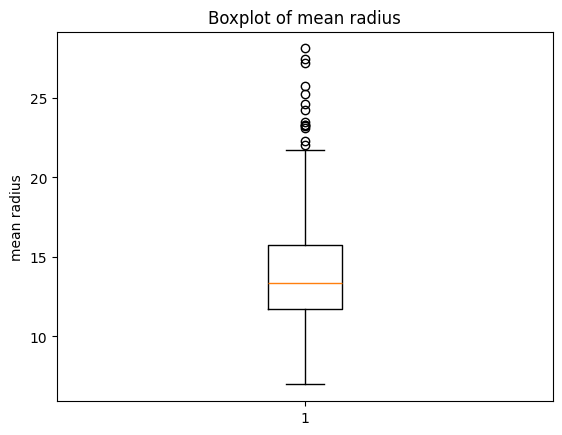


Boxplot of mean texture:



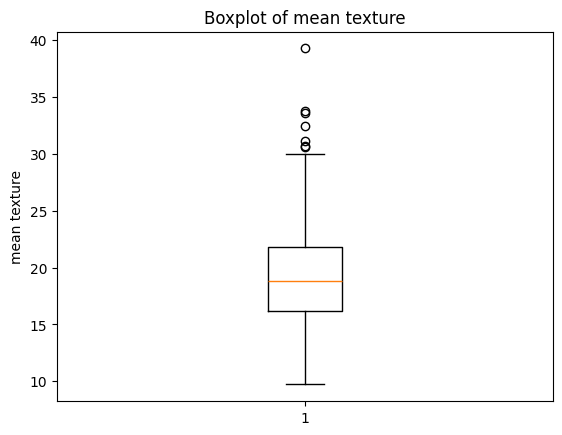


Boxplot of mean perimeter:



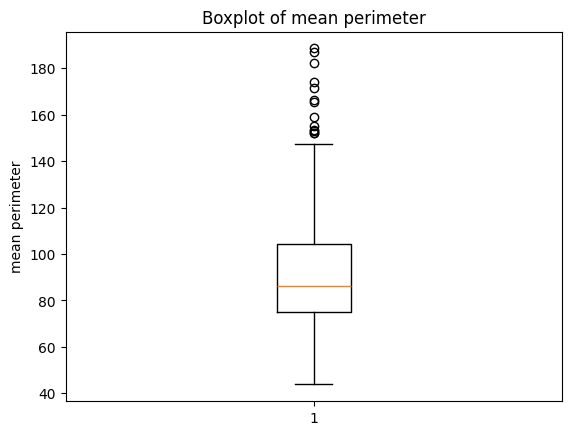


Boxplot of mean area:



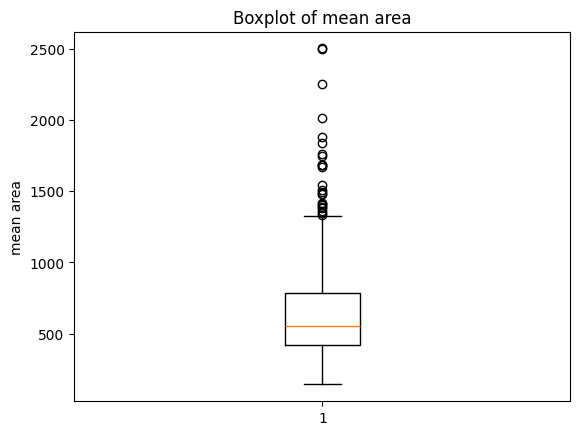


Boxplot of mean smoothness:



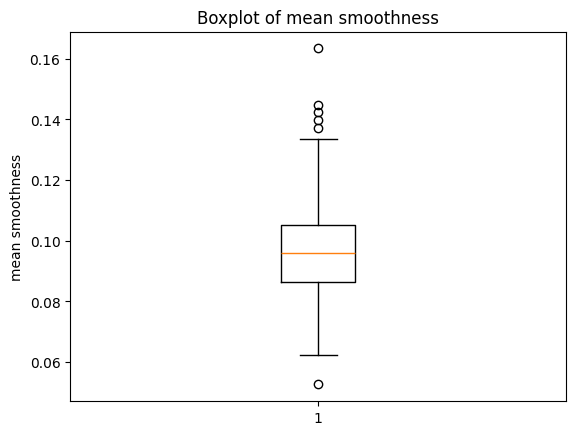


Boxplot of mean compactness:



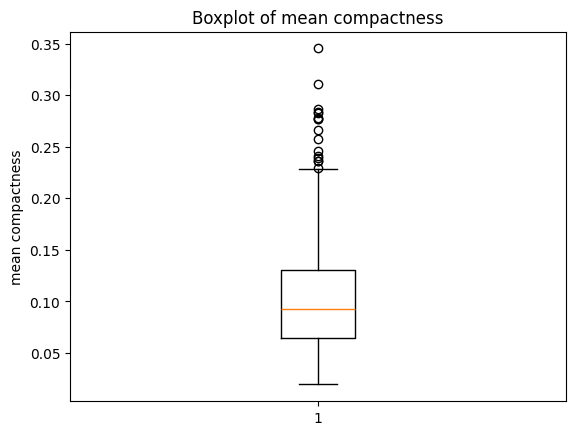


Boxplot of mean concavity:



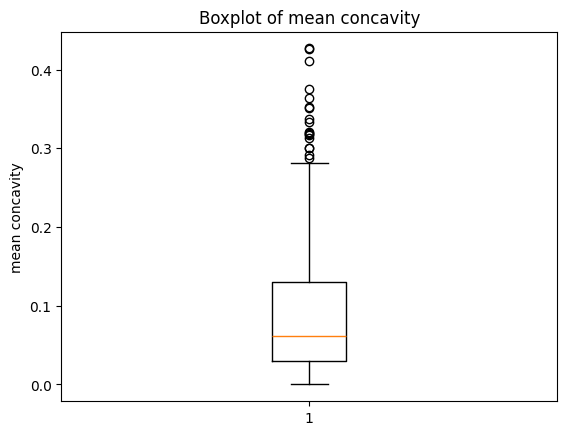


Boxplot of mean concave points:



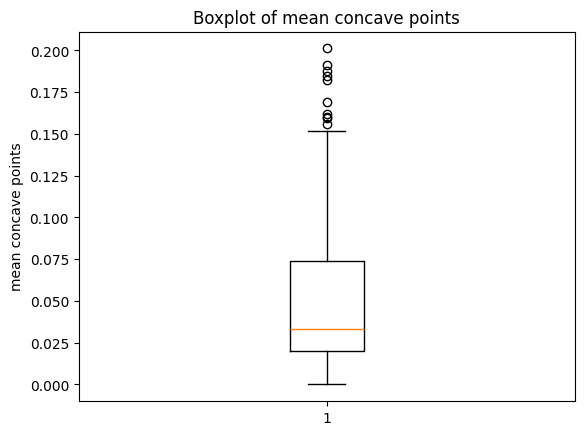


Boxplot of mean symmetry:



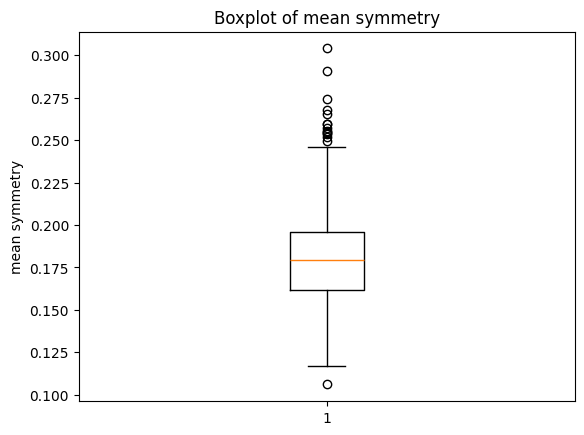


Boxplot of mean fractal dimension:



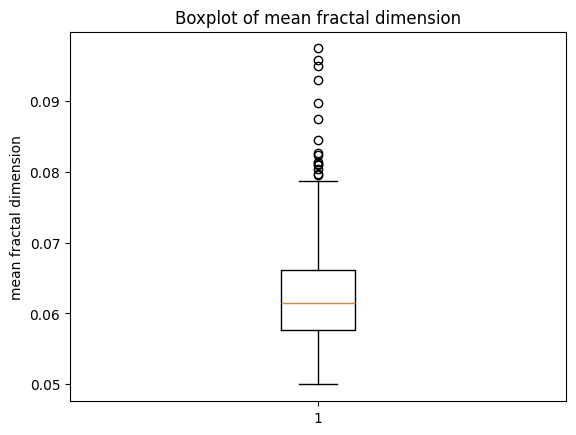


Boxplot of radius error:



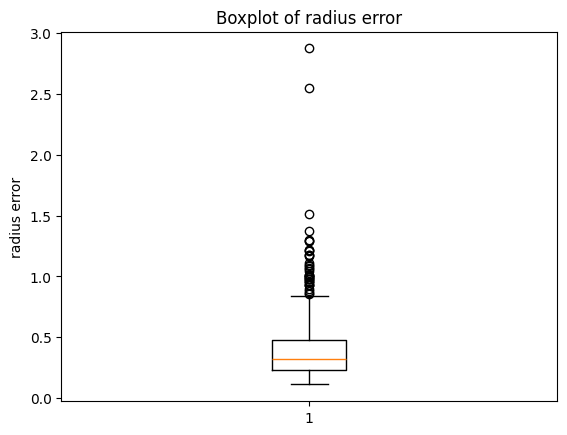


Boxplot of texture error:



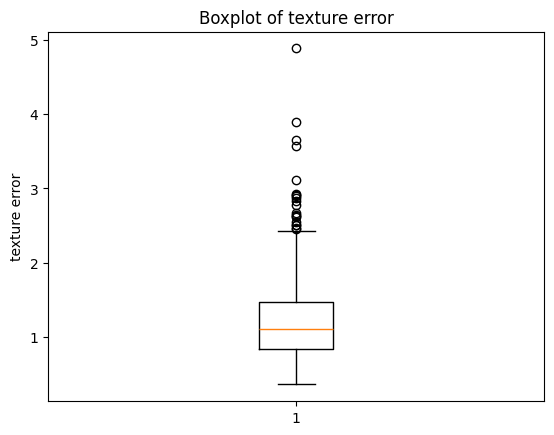


Boxplot of perimeter error:



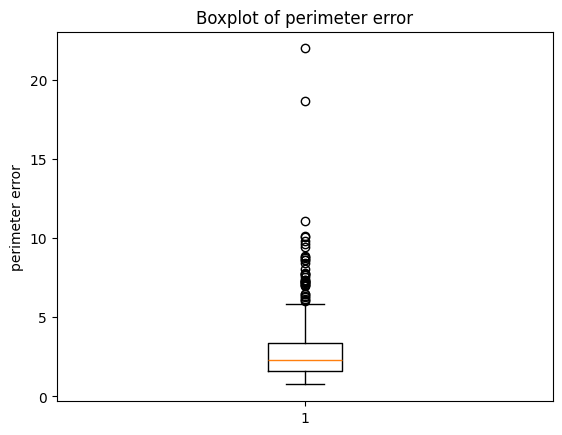


Boxplot of area error:



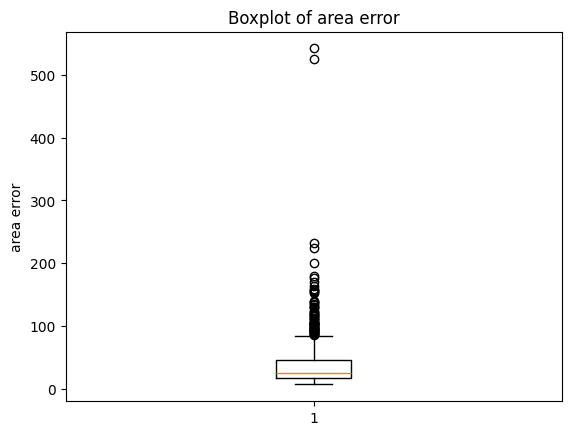


Boxplot of smoothness error:



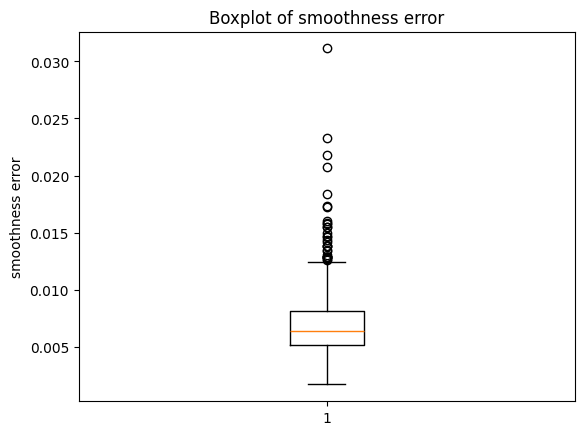


Boxplot of compactness error:



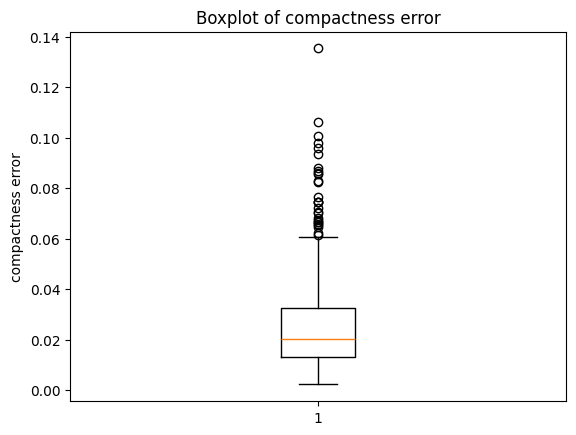


Boxplot of concavity error:



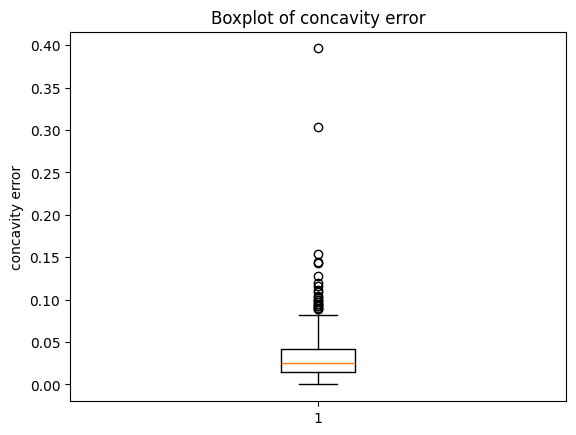


Boxplot of concave points error:



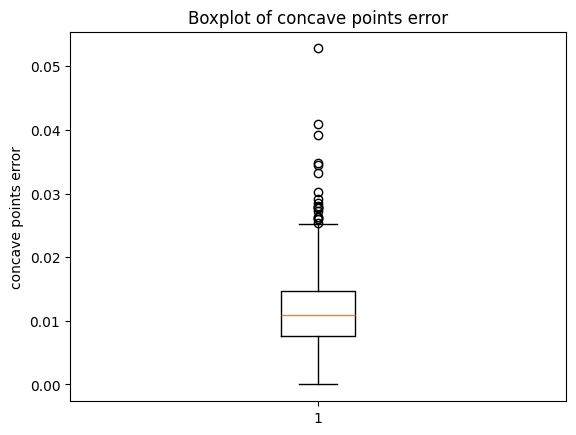


Boxplot of symmetry error:



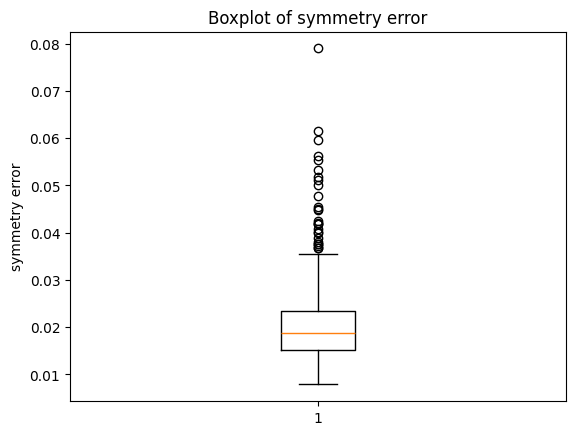


Boxplot of fractal dimension error:



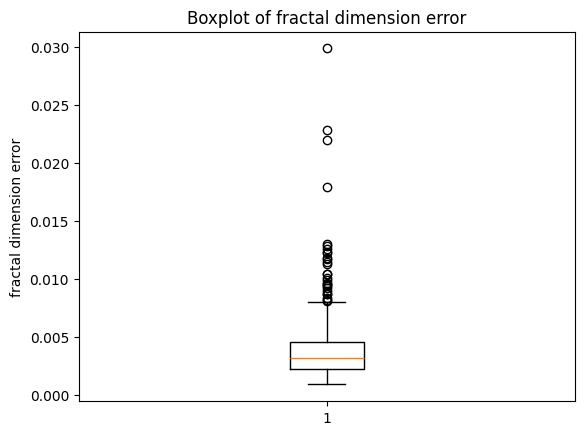


Boxplot of worst radius:



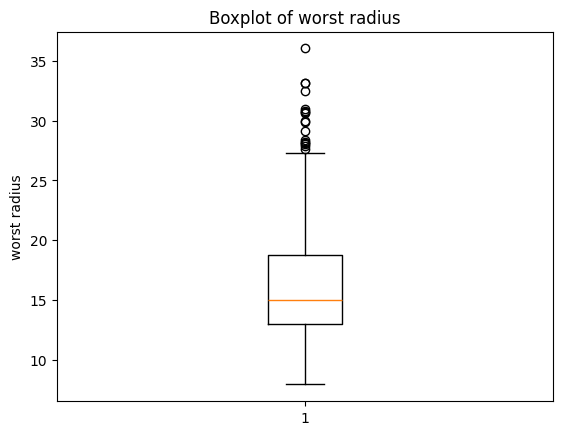


Boxplot of worst texture:



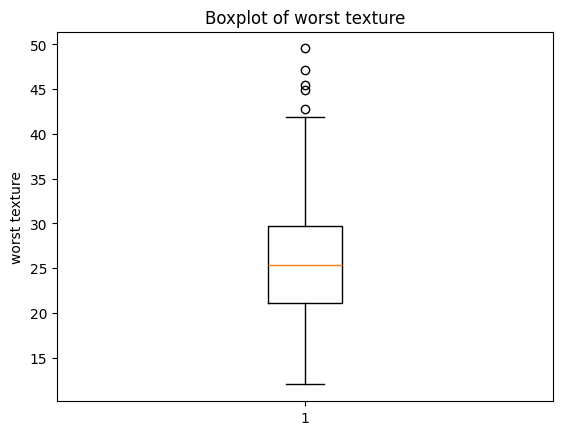


Boxplot of worst perimeter:



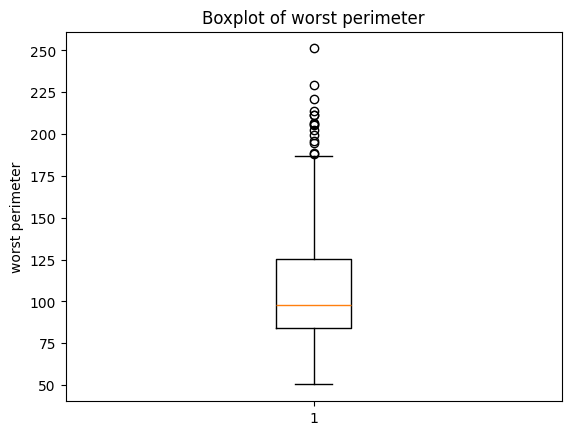


Boxplot of worst area:



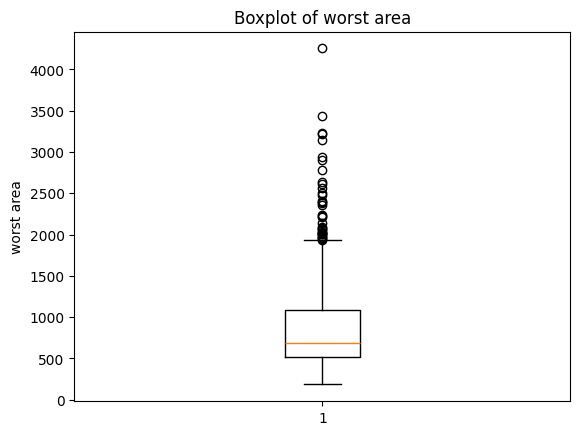


Boxplot of worst smoothness:



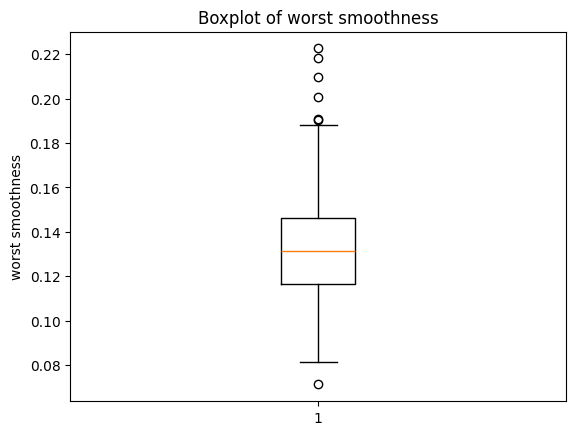


Boxplot of worst compactness:



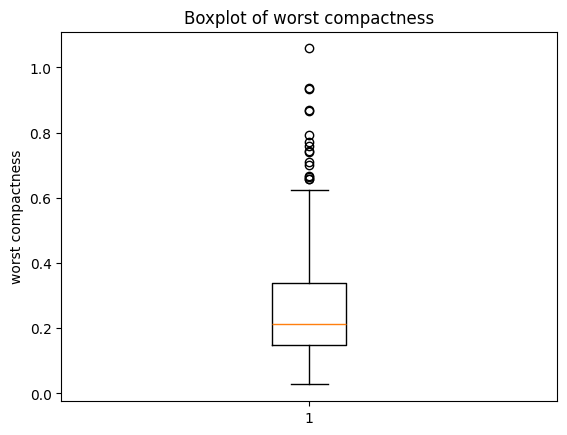


Boxplot of worst concavity:



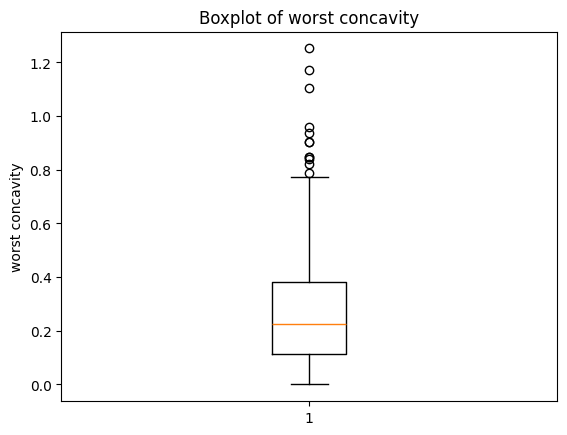


Boxplot of worst concave points:



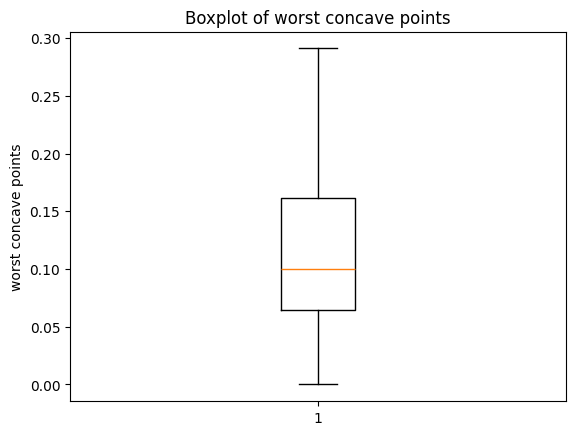


Boxplot of worst symmetry:



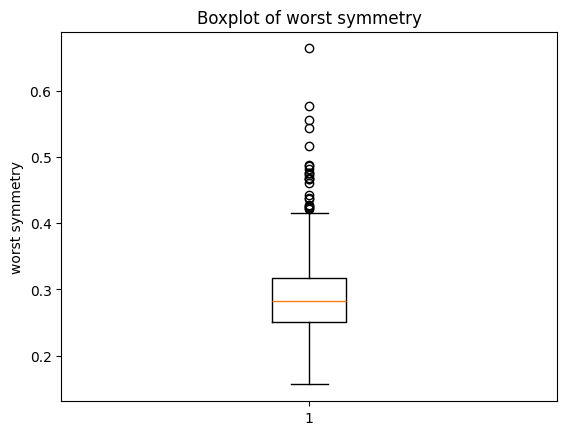


Boxplot of worst fractal dimension:



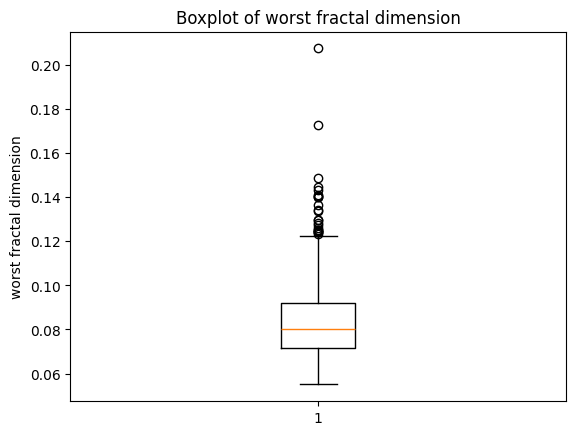


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
82         25.22         24.91           171.5     1878.0          0.10630   
108        22.27         19.67           152.8     1509.0          0.13260   
122        24.25         20.20           166.2     1761.0          0.14470   
164        23.27         22.04           152.1     1686.0          0.08439   
180        27.22         21.87           182.1     2250.0          0.10940   
202        23.29         26.67           158.9     1685.0          0.11410   
212        28.11         18.47           188.5     2499.0          0.11420   
236        23.21         26.97           153.5     1670.0          0.09509   
339        23.51         24.27           155.1     1747.0          0.10690   
352        25.73         17.46           174.2     2010.0          0.11490   
369        22.01         21.90           147.2     1482.0          0.10630   
461        27.42         26.27           186.9     2501.0      

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
219        19.53         32.47          128.00     1223.0          0.08420   
232        11.22         33.81           70.79      386.8          0.07780   
239        17.46         39.28          113.40      920.6          0.09812   
259        15.53         33.56          103.70      744.9          0.10630   
265        20.73         31.12          135.70     1419.0          0.09469   
455        13.38         30.72           86.34      557.2          0.09245   
562        15.22         30.62          103.40      716.9          0.10480   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
219           0.11300        0.114500             0.066370         0.1428   
232           0.03574        0.004967             0.006434         0.1845   
239           0.12980        0.141700             0.088110         0.1809   
259           0.16390        0.175100             0.083990         

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
82         25.22         24.91           171.5     1878.0          0.10630   
108        22.27         19.67           152.8     1509.0          0.13260   
122        24.25         20.20           166.2     1761.0          0.14470   
164        23.27         22.04           152.1     1686.0          0.08439   
180        27.22         21.87           182.1     2250.0          0.10940   
202        23.29         26.67           158.9     1685.0          0.11410   
212        28.11         18.47           188.5     2499.0          0.11420   
236        23.21         26.97           153.5     1670.0          0.09509   
339        23.51         24.27           155.1     1747.0          0.10690   
352        25.73         17.46           174.2     2010.0          0.11490   
461        27.42         26.27           186.9     2501.0          0.10840   
503        23.09         19.83           152.1     1682.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
23         21.16         23.04           137.2     1404.0          0.09428   
82         25.22         24.91           171.5     1878.0          0.10630   
108        22.27         19.67           152.8     1509.0          0.13260   
122        24.25         20.20           166.2     1761.0          0.14470   
164        23.27         22.04           152.1     1686.0          0.08439   
180        27.22         21.87           182.1     2250.0          0.10940   
202        23.29         26.67           158.9     1685.0          0.11410   
212        28.11         18.47           188.5     2499.0          0.11420   
236        23.21         26.97           153.5     1670.0          0.09509   
250        20.94         23.56           138.9     1364.0          0.10070   
265        20.73         31.12           135.7     1419.0          0.09469   
272        21.75         20.99           147.3     1491.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1          0.14250   
105       13.110         15.56           87.21      530.2          0.13980   
122       24.250         20.20          166.20     1761.0          0.14470   
504        9.268         12.87           61.49      248.7          0.16340   
520        9.295         13.90           59.96      257.8          0.13710   
568        7.760         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
3             0.28390         0.24140              0.10520         0.2597   
105           0.17650         0.20710              0.09601         0.1925   
122           0.28670         0.42680              0.20120         0.2655   
504           0.22390         0.09730              0.05252         0.2378   
520           0.12250         0.03332              0.02421         0

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0           0.1184   
3          11.42         20.38           77.58      386.1           0.1425   
9          12.46         24.04           83.97      475.9           0.1186   
12         19.17         24.80          132.40     1123.0           0.0974   
14         13.73         22.61           93.60      578.3           0.1131   
78         20.18         23.97          143.70     1245.0           0.1286   
82         25.22         24.91          171.50     1878.0           0.1063   
108        22.27         19.67          152.80     1509.0           0.1326   
122        24.25         20.20          166.20     1761.0           0.1447   
181        21.09         26.57          142.70     1311.0           0.1141   
190        14.22         23.12           94.37      609.9           0.1075   
258        15.66         23.20          110.20      773.5       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
68         9.029         17.33           58.79      250.5          0.10660   
78        20.180         23.97          143.70     1245.0          0.12860   
82        25.220         24.91          171.50     1878.0          0.10630   
108       22.270         19.67          152.80     1509.0          0.13260   
112       14.260         19.65           97.83      629.9          0.07837   
122       24.250         20.20          166.20     1761.0          0.14470   
152        9.731         15.34           63.78      300.2          0.10720   
180       27.220         21.87          182.10     2250.0          0.10940   
202       23.290         26.67          158.90     1685.0          0.11410   
212       28.110         18.47          188.50     2499.0          0.11420   
258       15.660         23.20          110.20      773.5       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
78         20.18         23.97           143.7     1245.0           0.1286   
82         25.22         24.91           171.5     1878.0           0.1063   
108        22.27         19.67           152.8     1509.0           0.1326   
122        24.25         20.20           166.2     1761.0           0.1447   
180        27.22         21.87           182.1     2250.0           0.1094   
202        23.29         26.67           158.9     1685.0           0.1141   
212        28.11         18.47           188.5     2499.0           0.1142   
352        25.73         17.46           174.2     2010.0           0.1149   
393        21.61         22.28           144.4     1407.0           0.1167   
461        27.42         26.27           186.9     2501.0           0.1084   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
78             0.3454          0.3754               0.1604      

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1          0.14250   
22        15.340         14.26          102.50      704.4          0.10730   
25        17.140         16.40          116.00      912.7          0.11860   
60        10.170         14.88           64.55      311.9          0.11340   
78        20.180         23.97          143.70     1245.0          0.12860   
108       22.270         19.67          152.80     1509.0          0.13260   
122       24.250         20.20          166.20     1761.0          0.14470   
146       11.800         16.58           78.99      432.0          0.10910   
150       13.000         20.78           83.51      519.4          0.11350   
152        9.731         15.34           63.78      300.2          0.10720   
258       15.660         23.20          110.20      773.5          0.11090   
288       11.260         19.96           73.72      394.1       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1          0.14250   
9         12.460         24.04           83.97      475.9          0.11860   
68         9.029         17.33           58.79      250.5          0.10660   
71         8.888         14.64           58.79      244.0          0.09783   
78        20.180         23.97          143.70     1245.0          0.12860   
151        8.219         20.70           53.27      203.9          0.09405   
152        9.731         15.34           63.78      300.2          0.10720   
176        9.904         18.06           64.60      302.4          0.09699   
258       15.660         23.20          110.20      773.5          0.11090   
318        9.042         18.90           60.07      244.5          0.09968   
376       10.570         20.22           70.15      338.3          0.09073   
379       11.080         18.83           73.30      361.6       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
12         19.17         24.80          132.40     1123.0          0.09740   
25         17.14         16.40          116.00      912.7          0.11860   
27         18.61         20.25          122.10     1094.0          0.09440   
38         14.99         25.20           95.54      698.8          0.09387   
42         19.07         24.81          128.30     1104.0          0.09081   
77         18.05         16.15          120.20     1006.0          0.10650   
78         20.18         23.97          143.70     1245.0          0.12860   
82         25.22         24.91          171.50     1878.0          0.10630   
108        22.27         19.67          152.80     1509.0          0.13260   
122        24.25         20.20          166.20     1761.0          0.14470   
138        14.95         17.57           96.85      678.1       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
12        19.170         24.80          132.40     1123.0          0.09740   
83        19.100         26.29          129.10     1132.0          0.12150   
122       24.250         20.20          166.20     1761.0          0.14470   
136       11.710         16.67           74.72      423.6          0.10510   
152        9.731         15.34           63.78      300.2          0.10720   
192        9.720         18.22           60.73      288.1          0.06950   
245       10.480         19.86           66.72      337.7          0.10700   
258       15.660         23.20          110.20      773.5          0.11090   
314        8.597         18.60           54.09      221.2          0.10740   
345       10.260         14.71           66.20      321.6          0.09882   
389       19.550         23.21          128.90     1174.0          0.10100   
416        9.405         21.70           59.60      271.2       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
12         19.17         24.80          132.40     1123.0          0.09740   
25         17.14         16.40          116.00      912.7          0.11860   
38         14.99         25.20           95.54      698.8          0.09387   
42         19.07         24.81          128.30     1104.0          0.09081   
77         18.05         16.15          120.20     1006.0          0.10650   
78         20.18         23.97          143.70     1245.0          0.12860   
82         25.22         24.91          171.50     1878.0          0.10630   
108        22.27         19.67          152.80     1509.0          0.13260   
122        24.25         20.20          166.20     1761.0          0.14470   
138        14.95         17.57           96.85      678.1          0.11670   
161        19.19         15.94          126.30     1157.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38           122.8     1001.0          0.11840   
2          19.69         21.25           130.0     1203.0          0.10960   
4          20.29         14.34           135.1     1297.0          0.10030   
12         19.17         24.80           132.4     1123.0          0.09740   
18         19.81         22.15           130.0     1260.0          0.09831   
..           ...           ...             ...        ...              ...   
535        20.55         20.86           137.8     1308.0          0.10460   
563        20.92         25.09           143.0     1347.0          0.10990   
564        21.56         22.39           142.0     1479.0          0.11100   
565        20.13         28.25           131.2     1261.0          0.09780   
567        20.60         29.33           140.1     1265.0          0.11780   

     mean compactness  mean concavity  mean concave points  mea

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
71         8.888         14.64           58.79      244.0          0.09783   
76        13.530         10.94           87.91      559.2          0.12910   
110        9.777         16.99           62.50      290.2          0.10370   
111       12.630         20.76           82.15      480.4          0.09933   
116        8.950         15.76           58.74      245.2          0.09462   
122       24.250         20.20          166.20     1761.0          0.14470   
173       11.080         14.71           70.21      372.7          0.10060   
176        9.904         18.06           64.60      302.4          0.09699   
185       10.080         15.11           63.76      317.5          0.09267   
196       13.770         22.29           90.63      588.9          0.12000   
212       28.110         18.47          188.50     2499.0          0.11420   
213       17.420         25.56          114.50      948.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1          0.14250   
9         12.460         24.04           83.97      475.9          0.11860   
12        19.170         24.80          132.40     1123.0          0.09740   
42        19.070         24.81          128.30     1104.0          0.09081   
62        14.250         22.15           96.42      645.7          0.10490   
68         9.029         17.33           58.79      250.5          0.10660   
71         8.888         14.64           58.79      244.0          0.09783   
78        20.180         23.97          143.70     1245.0          0.12860   
108       22.270         19.67          152.80     1509.0          0.13260   
112       14.260         19.65           97.83      629.9          0.07837   
116        8.950         15.76           58.74      245.2          0.09462   
122       24.250         20.20          166.20     1761.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
12        19.170         24.80          132.40     1123.0          0.09740   
42        19.070         24.81          128.30     1104.0          0.09081   
68         9.029         17.33           58.79      250.5          0.10660   
78        20.180         23.97          143.70     1245.0          0.12860   
108       22.270         19.67          152.80     1509.0          0.13260   
112       14.260         19.65           97.83      629.9          0.07837   
116        8.950         15.76           58.74      245.2          0.09462   
122       24.250         20.20          166.20     1761.0          0.14470   
152        9.731         15.34           63.78      300.2          0.10720   
176        9.904         18.06           64.60      302.4          0.09699   
190       14.220         23.12           94.37      609.9          0.10750   
202       23.290         26.67          158.90     1685.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
12        19.170         24.80          132.40     1123.0          0.09740   
42        19.070         24.81          128.30     1104.0          0.09081   
68         9.029         17.33           58.79      250.5          0.10660   
78        20.180         23.97          143.70     1245.0          0.12860   
138       14.950         17.57           96.85      678.1          0.11670   
152        9.731         15.34           63.78      300.2          0.10720   
161       19.190         15.94          126.30     1157.0          0.08694   
210       20.580         22.14          134.70     1290.0          0.09090   
213       17.420         25.56          114.50      948.0          0.10060   
258       15.660         23.20          110.20      773.5          0.11090   
288       11.260         19.96           73.72      394.1          0.08020   
290       14.410         19.73           96.03      651.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1          0.14250   
12        19.170         24.80          132.40     1123.0          0.09740   
22        15.340         14.26          102.50      704.4          0.10730   
42        19.070         24.81          128.30     1104.0          0.09081   
60        10.170         14.88           64.55      311.9          0.11340   
63         9.173         13.86           59.20      260.9          0.07721   
68         9.029         17.33           58.79      250.5          0.10660   
78        20.180         23.97          143.70     1245.0          0.12860   
119       17.950         20.01          114.20      982.0          0.08402   
122       24.250         20.20          166.20     1761.0          0.14470   
138       14.950         17.57           96.85      678.1          0.11670   
146       11.800         16.58           78.99      432.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1          0.14250   
9         12.460         24.04           83.97      475.9          0.11860   
12        19.170         24.80          132.40     1123.0          0.09740   
14        13.730         22.61           93.60      578.3          0.11310   
68         9.029         17.33           58.79      250.5          0.10660   
71         8.888         14.64           58.79      244.0          0.09783   
83        19.100         26.29          129.10     1132.0          0.12150   
112       14.260         19.65           97.83      629.9          0.07837   
122       24.250         20.20          166.20     1761.0          0.14470   
145       11.900         14.65           78.11      432.8          0.11520   
147       14.950         18.77           97.84      689.5          0.08138   
151        8.219         20.70           53.27      203.9       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
23         21.16         23.04           137.2     1404.0          0.09428   
82         25.22         24.91           171.5     1878.0          0.10630   
108        22.27         19.67           152.8     1509.0          0.13260   
164        23.27         22.04           152.1     1686.0          0.08439   
180        27.22         21.87           182.1     2250.0          0.10940   
212        28.11         18.47           188.5     2499.0          0.11420   
219        19.53         32.47           128.0     1223.0          0.08420   
236        23.21         26.97           153.5     1670.0          0.09509   
265        20.73         31.12           135.7     1419.0          0.09469   
272        21.75         20.99           147.3     1491.0          0.09401   
339        23.51         24.27           155.1     1747.0          0.10690   
352        25.73         17.46           174.2     2010.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
219        19.53         32.47           128.0     1223.0          0.08420   
239        17.46         39.28           113.4      920.6          0.09812   
259        15.53         33.56           103.7      744.9          0.10630   
265        20.73         31.12           135.7     1419.0          0.09469   
562        15.22         30.62           103.4      716.9          0.10480   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
219            0.1130          0.1145              0.06637         0.1428   
239            0.1298          0.1417              0.08811         0.1809   
259            0.1639          0.1751              0.08399         0.2091   
265            0.1143          0.1367              0.08646         0.1769   
562            0.2087          0.2550              0.09429         0.2128   

     mean fractal dimension  ...  worst texture  worst perimeter  wo

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
23         21.16         23.04           137.2     1404.0          0.09428   
82         25.22         24.91           171.5     1878.0          0.10630   
108        22.27         19.67           152.8     1509.0          0.13260   
180        27.22         21.87           182.1     2250.0          0.10940   
212        28.11         18.47           188.5     2499.0          0.11420   
236        23.21         26.97           153.5     1670.0          0.09509   
265        20.73         31.12           135.7     1419.0          0.09469   
272        21.75         20.99           147.3     1491.0          0.09401   
339        23.51         24.27           155.1     1747.0          0.10690   
352        25.73         17.46           174.2     2010.0          0.11490   
368        21.71         17.25           140.9     1546.0          0.09384   
369        22.01         21.90           147.2     1482.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38           122.8     1001.0          0.11840   
1          20.57         17.77           132.9     1326.0          0.08474   
18         19.81         22.15           130.0     1260.0          0.09831   
23         21.16         23.04           137.2     1404.0          0.09428   
24         16.65         21.38           110.0      904.6          0.11210   
56         19.21         18.57           125.5     1152.0          0.10530   
82         25.22         24.91           171.5     1878.0          0.10630   
108        22.27         19.67           152.8     1509.0          0.13260   
122        24.25         20.20           166.2     1761.0          0.14470   
162        19.59         18.15           130.7     1214.0          0.11200   
164        23.27         22.04           152.1     1686.0          0.08439   
180        27.22         21.87           182.1     2250.0       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1           0.1425   
41        10.950         21.35           71.90      371.1           0.1227   
192        9.720         18.22           60.73      288.1           0.0695   
203       13.810         23.75           91.56      597.8           0.1323   
379       11.080         18.83           73.30      361.6           0.1216   
504        9.268         12.87           61.49      248.7           0.1634   
505        9.676         13.14           64.12      272.5           0.1255   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
3             0.28390          0.2414              0.10520         0.2597   
41            0.12180          0.1044              0.05669         0.1895   
192           0.02344          0.0000              0.00000         0.1653   
203           0.17680          0.1558              0.09176         

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
3          11.42         20.38           77.58      386.1          0.14250   
9          12.46         24.04           83.97      475.9          0.11860   
14         13.73         22.61           93.60      578.3          0.11310   
15         14.54         27.54           96.73      658.8          0.11390   
26         14.58         21.53           97.41      644.8          0.10540   
33         19.27         26.47          127.90     1162.0          0.09401   
42         19.07         24.81          128.30     1104.0          0.09081   
72         17.20         24.52          114.20      929.4          0.10710   
108        22.27         19.67          152.80     1509.0          0.13260   
181        21.09         26.57          142.70     1311.0          0.11410   
190        14.22         23.12           94.37      609.9       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
9         12.460         24.04           83.97      475.9          0.11860   
68         9.029         17.33           58.79      250.5          0.10660   
108       22.270         19.67          152.80     1509.0          0.13260   
152        9.731         15.34           63.78      300.2          0.10720   
190       14.220         23.12           94.37      609.9          0.10750   
202       23.290         26.67          158.90     1685.0          0.11410   
252       19.730         19.82          130.70     1206.0          0.10620   
379       11.080         18.83           73.30      361.6          0.12160   
400       17.910         21.02          124.40      994.0          0.12300   
430       14.900         22.53          102.10      685.0          0.09947   
562       15.220         30.62          103.40      716.9          0.10480   
567       20.600         29.33          140.10     1265.0       

None

Empty DataFrame
Columns: [mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension, target]
Index: []

[0 rows x 31 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
3         11.420         20.38           77.58      386.1          0.14250   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
15        14.540         27.54           96.73      658.8          0.11390   
22        15.340         14.26          102.50      704.4          0.10730   
26        14.580         21.53           97.41      644.8          0.10540   
31        11.840         18.70           77.93      440.6          0.11090   
34        16.130         17.88          107.00      807.2          0.10400   
35        16.740         21.59          110.10      869.5          0.09610   
42        19.070         24.81          128.30     1104.0          0.09081   
68         9.029         17.33           58.79      250.5       

None

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3         11.420         20.38           77.58      386.1          0.14250   
5         12.450         15.70           82.57      477.1          0.12780   
9         12.460         24.04           83.97      475.9          0.11860   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
26        14.580         21.53           97.41      644.8          0.10540   
31        11.840         18.70           77.93      440.6          0.11090   
34        16.130         17.88          107.00      807.2          0.10400   
72        17.200         24.52          114.20      929.4          0.10710   
105       13.110         15.56           87.21      530.2          0.13980   
118       15.780         22.91          105.70      782.6          0.11550   
151        8.219         20.70           53.27      203.9       

None

In [65]:
columns = df.drop(columns="target").columns

for col in columns:
    print(f"Boxplot of {col}:")
    print()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
    print()



for col in columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(outliers)
  print()


  outlier_indices = outliers.index.union(outliers.index)
  display(df.info())

In [56]:
print()
print("Table of the statistical data for all numerical columns:")
display(df.drop(columns="target").describe())
print()
print("Malignant & Benign")
display(df['target'].value_counts())


Table of the statistical data for all numerical columns:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



Malignant & Benign


,count
target,
1,357
0,212


Heatmap of Correlation



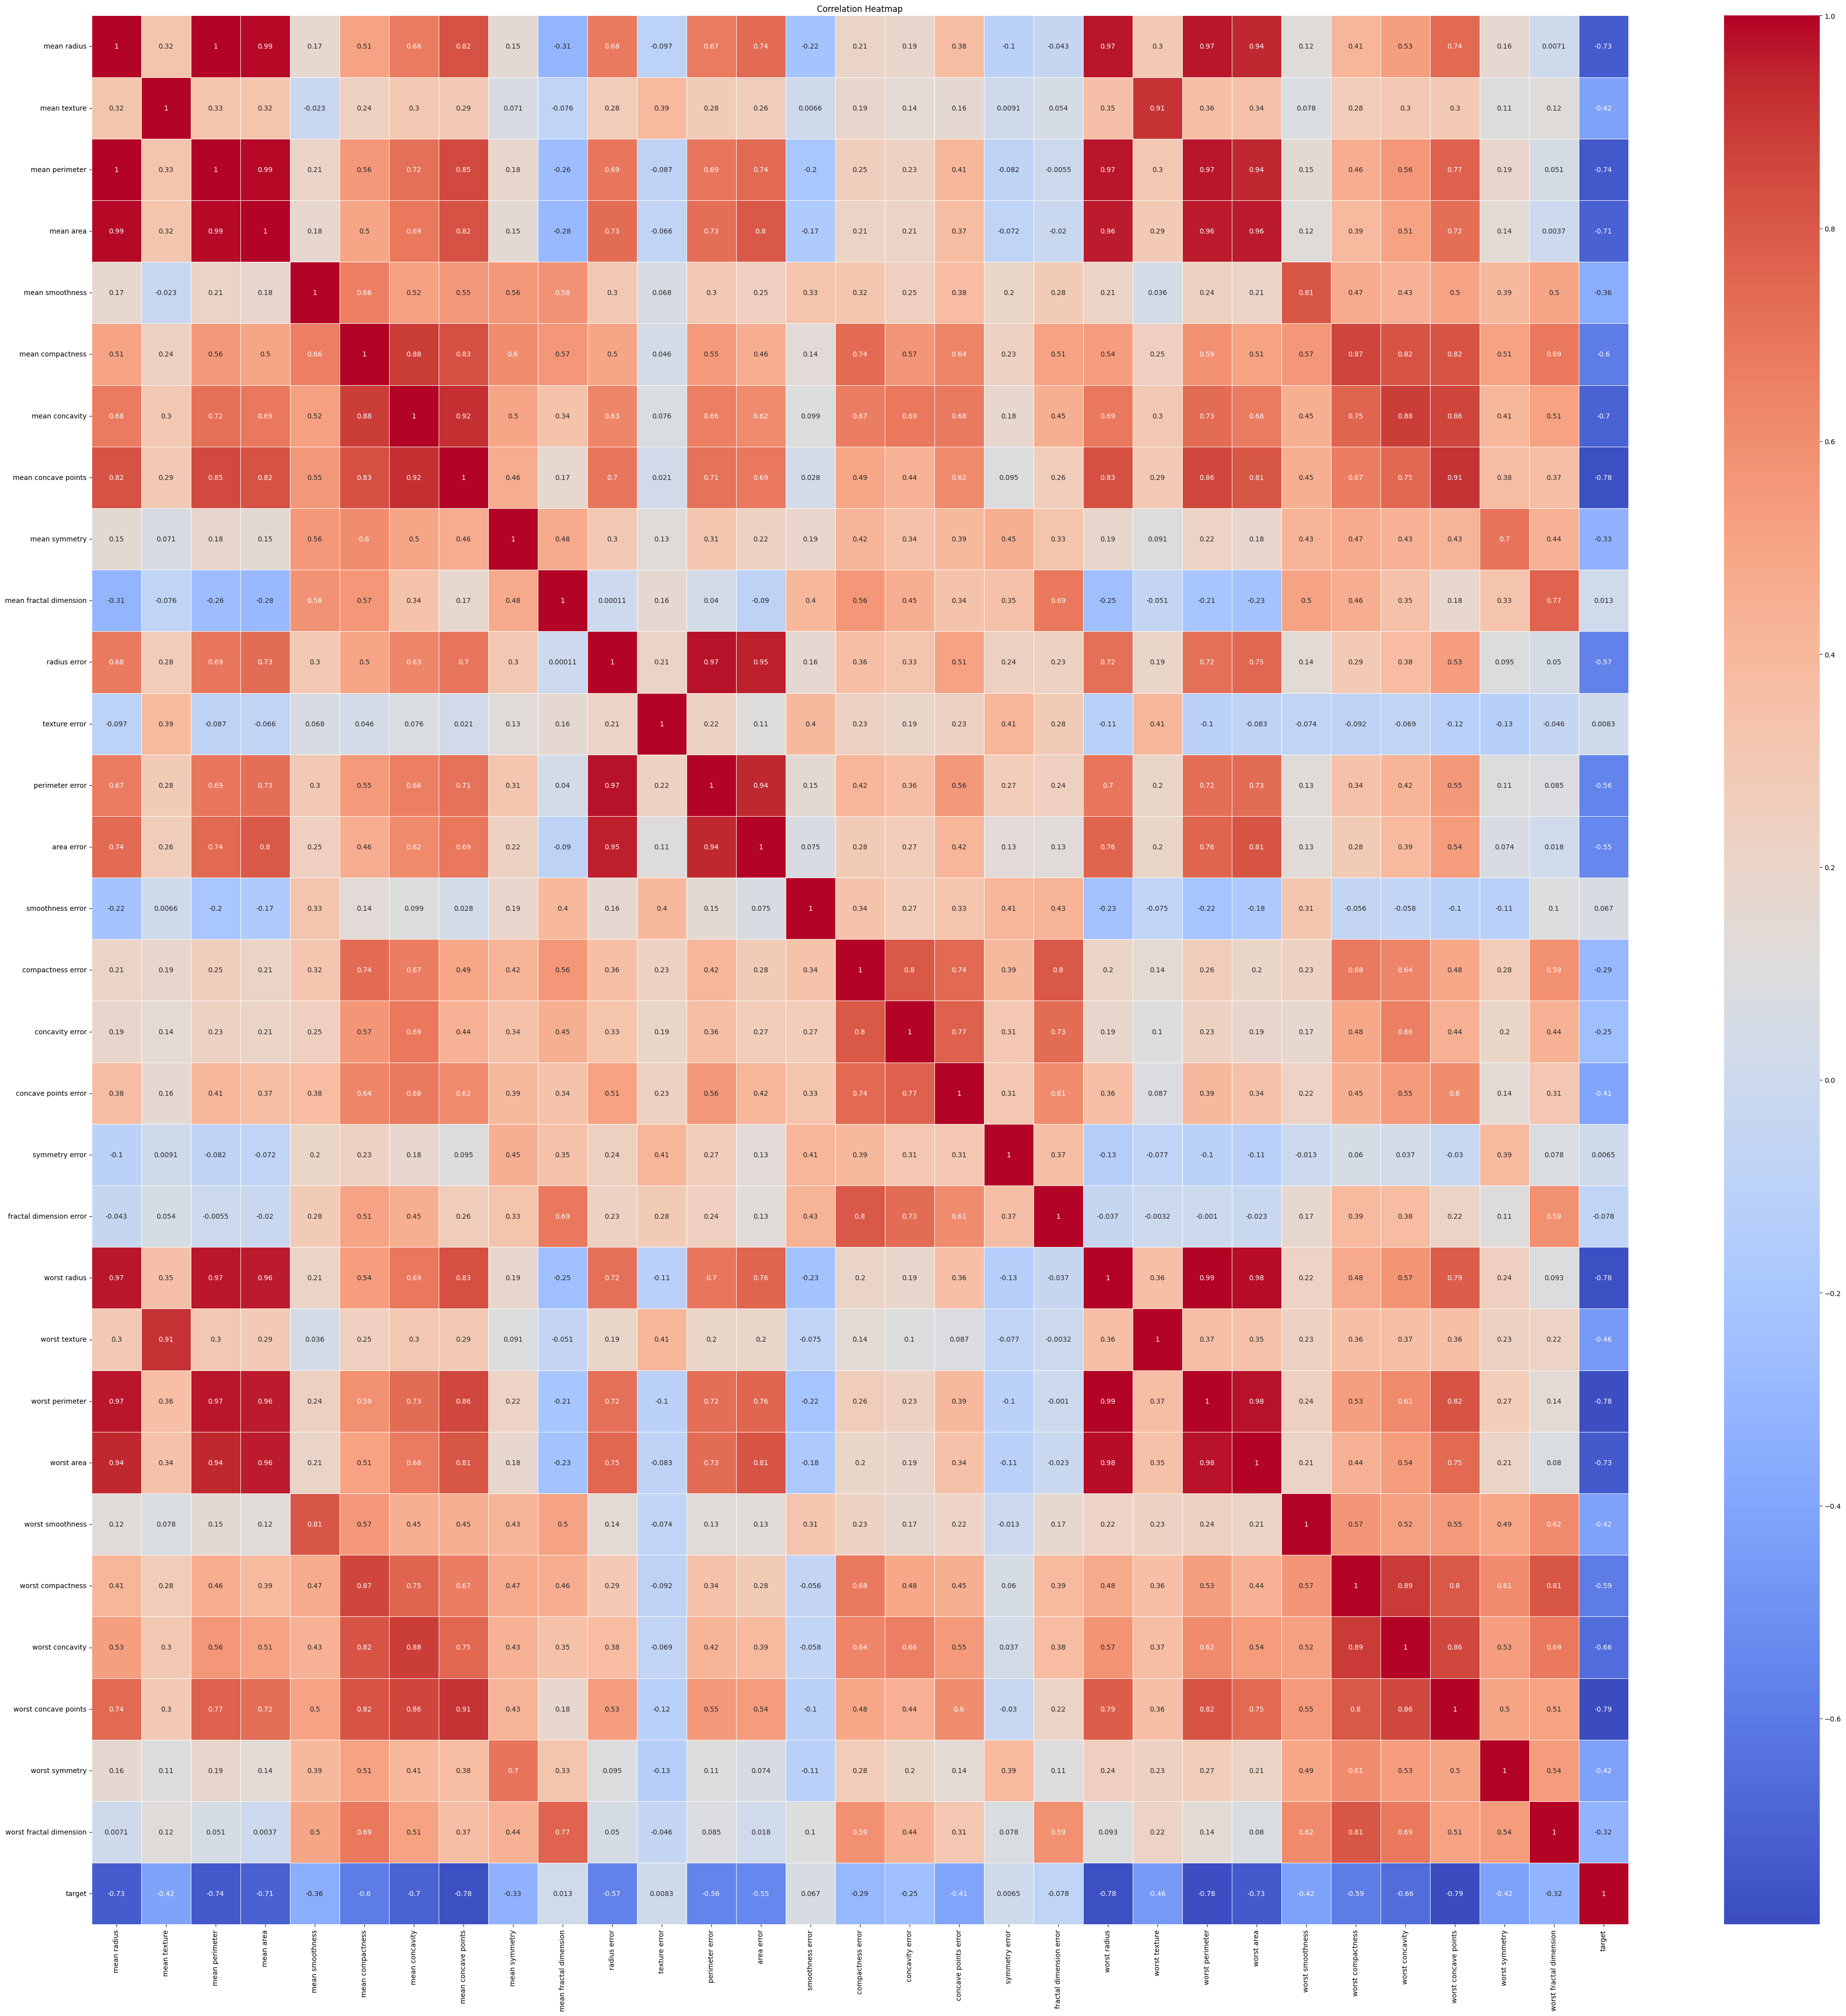

In [28]:
print("Heatmap of Correlation")
print()
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Radius vs Perimeter



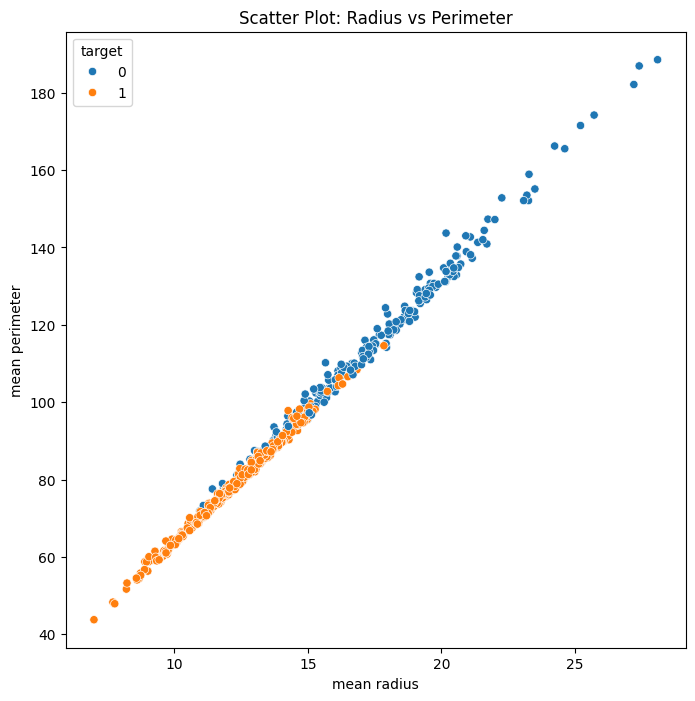


Radius vs Texture



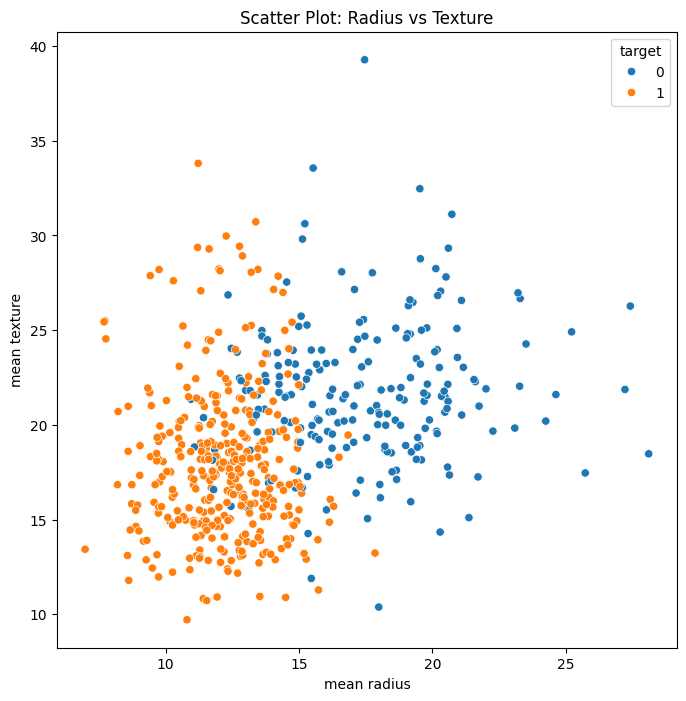


Radius vs Area



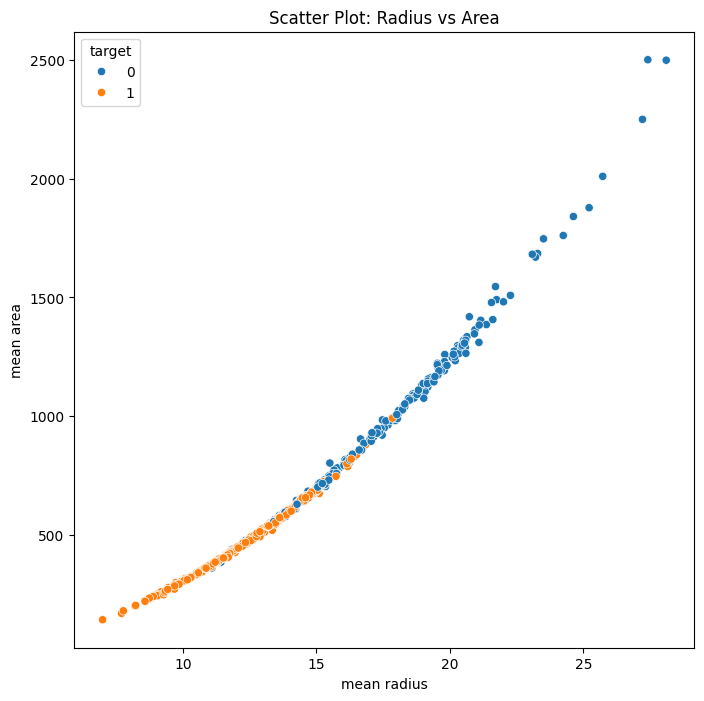


Radius vs Symmetry



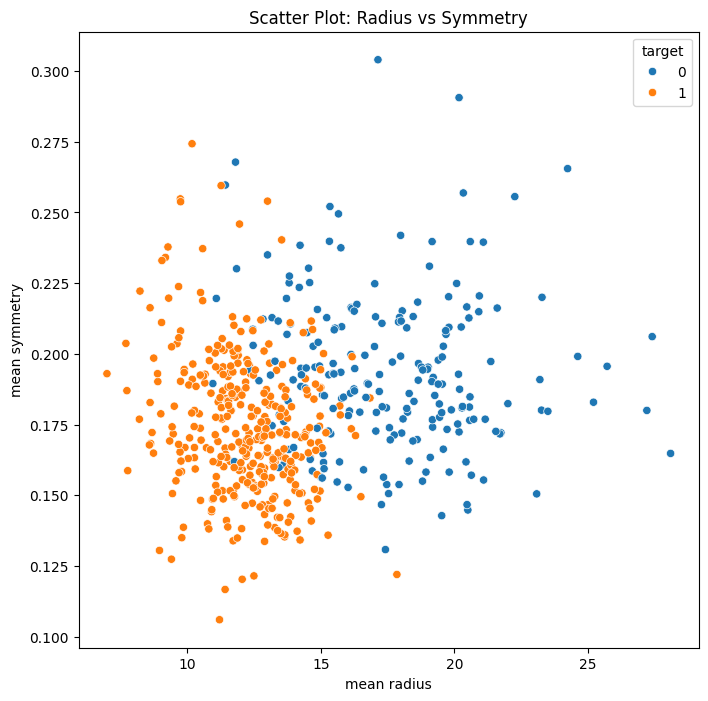


Radius vs Concavity



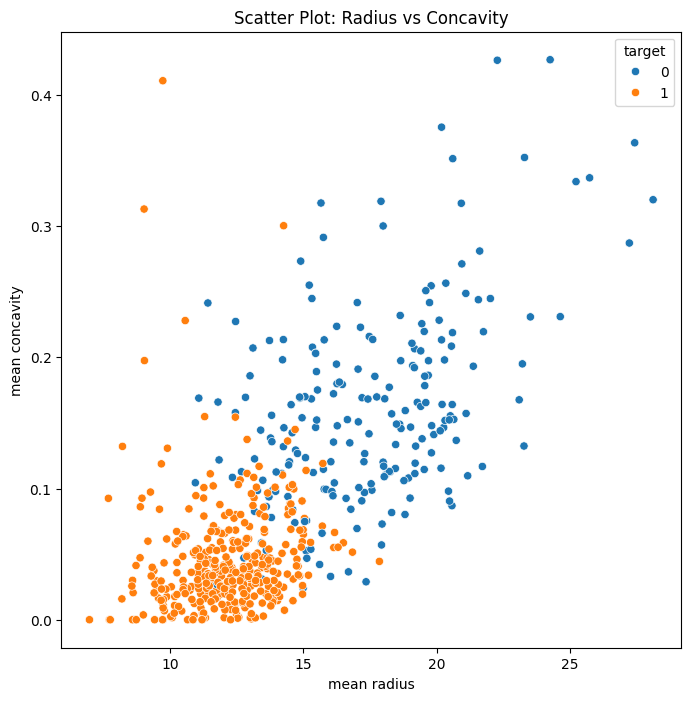


Radius vs Smoothness



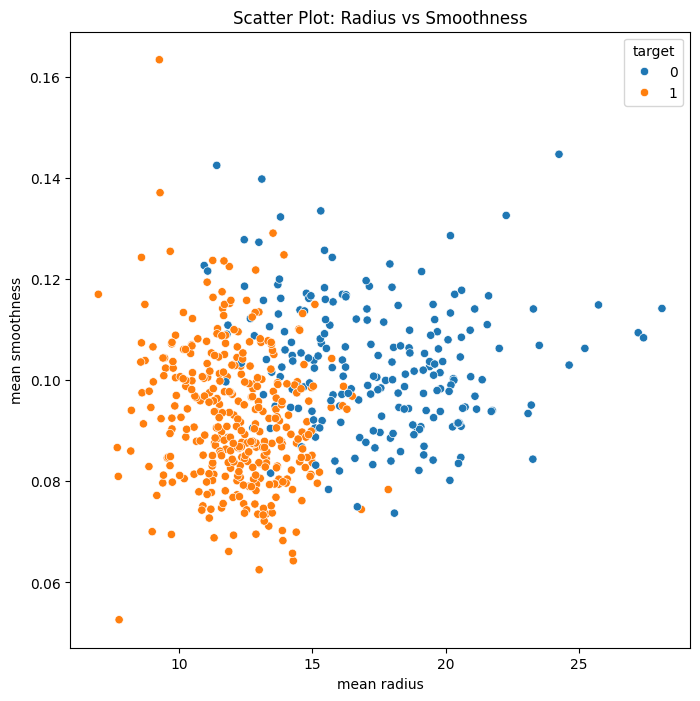


Radius vs Fractal dimension



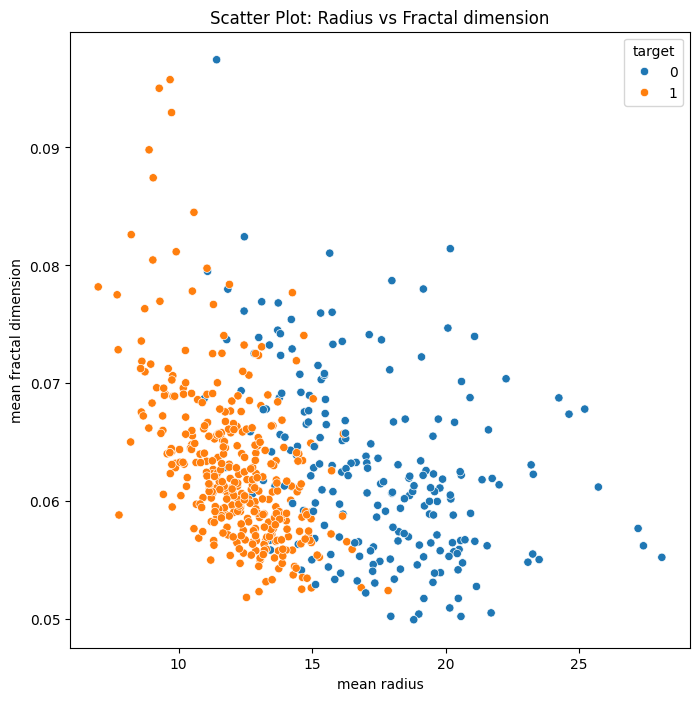


Radius vs Compactness



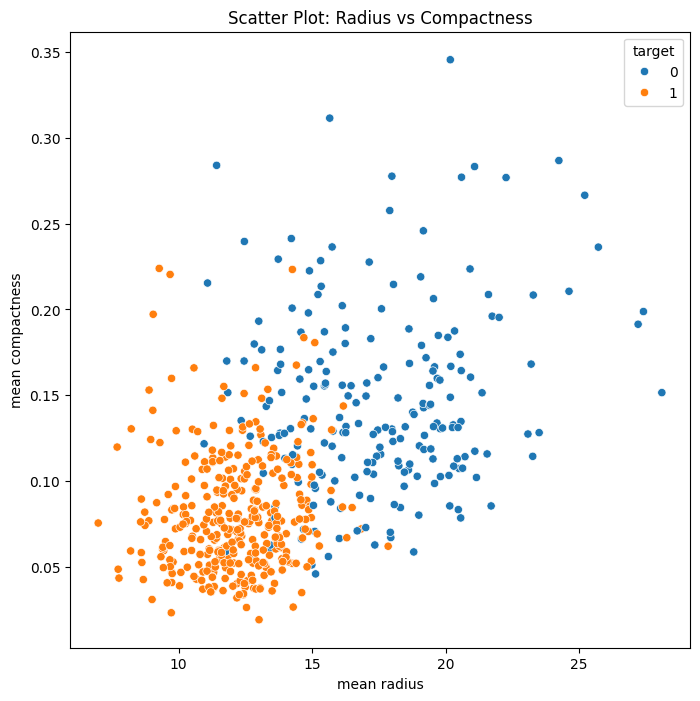


Concavity vs Concave Points



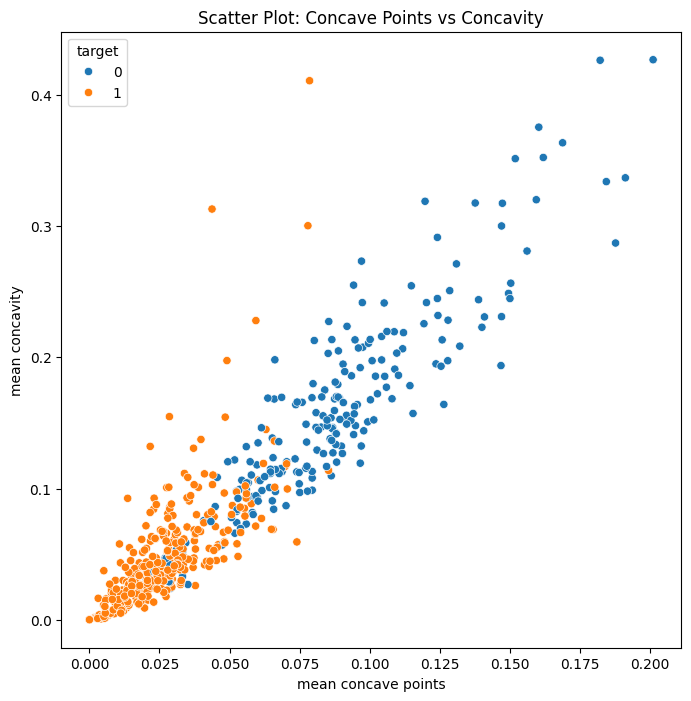


Radius vs Worst Radius



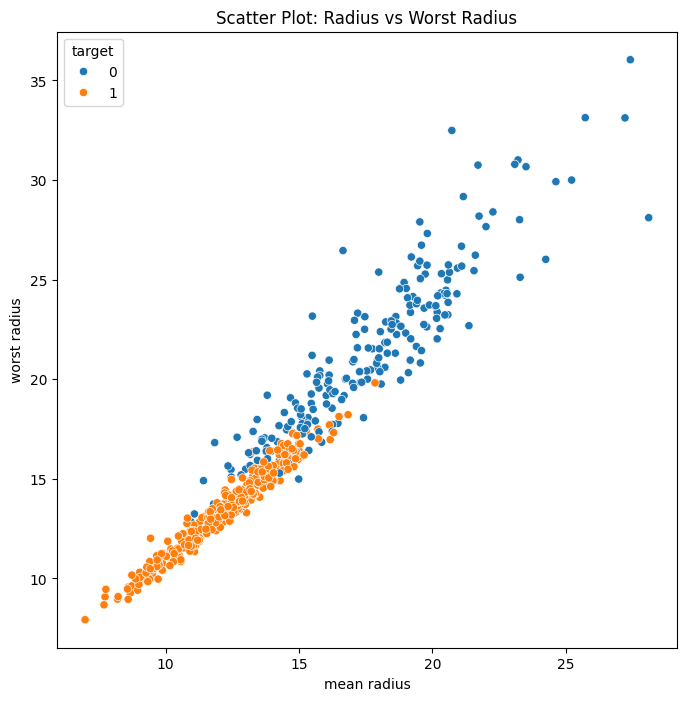


Area vs Worst Area



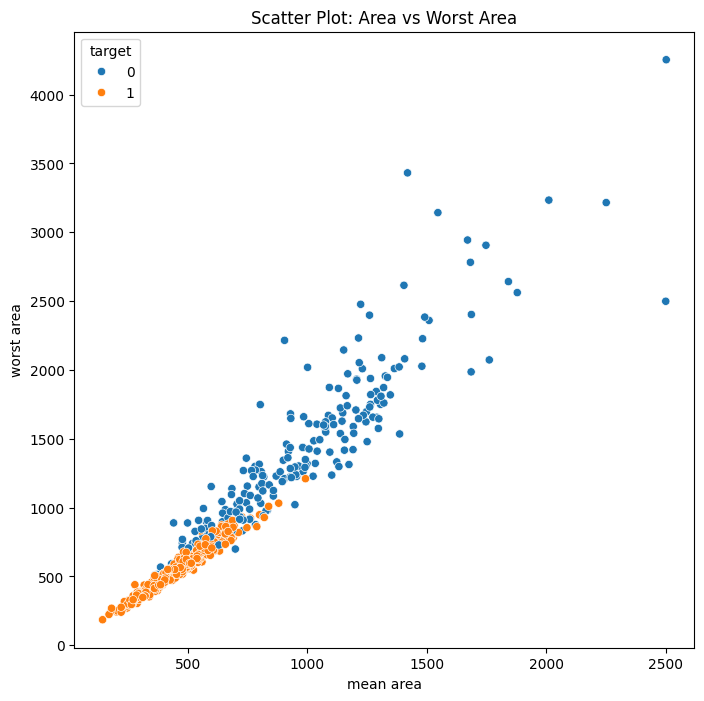


Worst Concavity vs Worst Concave Points



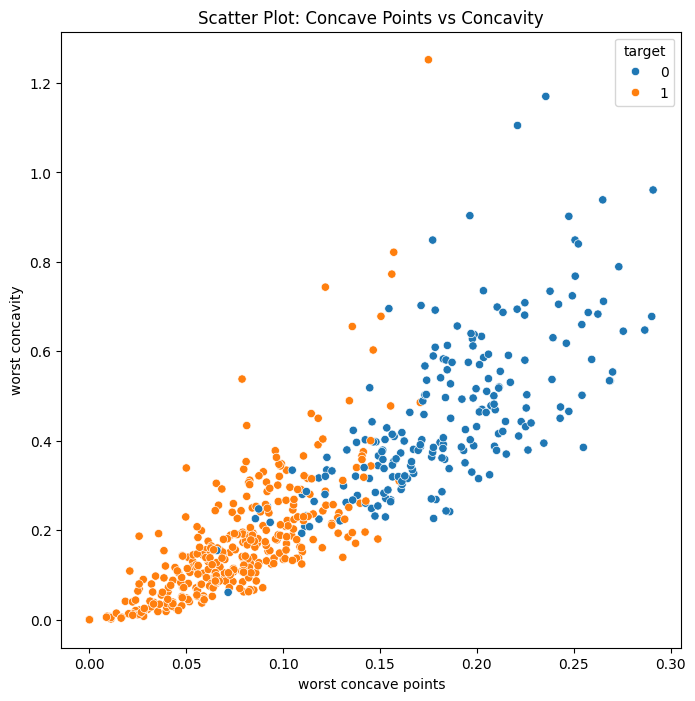


Worst Radius vs Worst Perimeter



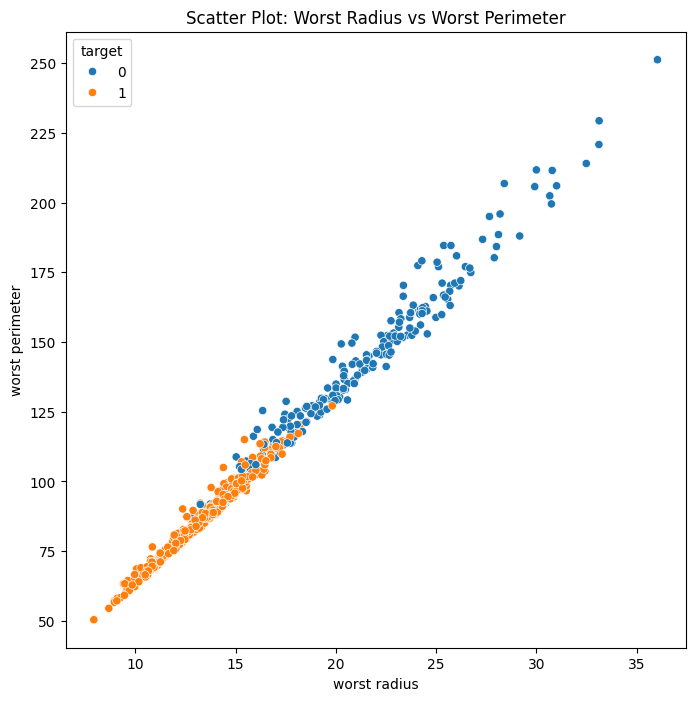


Radius vs Worst Perimeter



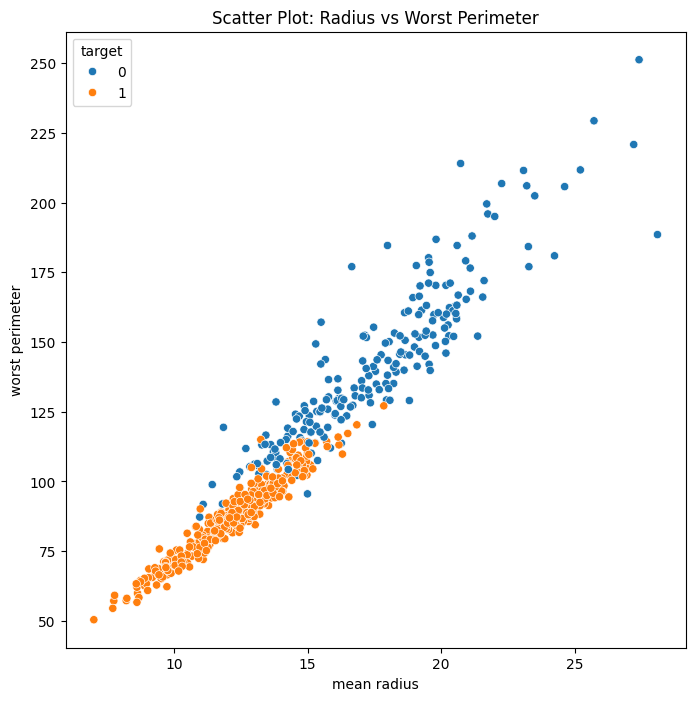

In [44]:
print("Radius vs Perimeter")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean perimeter", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Perimeter")
plt.show()
print()

print("Radius vs Texture")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean texture", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Texture")
plt.show()
print()

print("Radius vs Area")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean area", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Area")
plt.show()
print()

print("Radius vs Symmetry")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean symmetry", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Symmetry")
plt.show()
print()

print("Radius vs Concavity")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean concavity", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Concavity")
plt.show()
print()

print("Radius vs Smoothness")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean smoothness", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Smoothness")
plt.show()
print()

print("Radius vs Fractal dimension")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean fractal dimension", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Fractal dimension")
plt.show()
print()

print("Radius vs Compactness")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="mean compactness", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Compactness")
plt.show()
print()

print("Concavity vs Concave Points")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean concave points", y="mean concavity", hue="target", data=df,)
plt.title("Scatter Plot: Concave Points vs Concavity")
plt.show()
print()

print("Radius vs Worst Radius")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="worst radius", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Worst Radius")
plt.show()
print()


print("Area vs Worst Area")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean area", y="worst area", hue="target", data=df,)
plt.title("Scatter Plot: Area vs Worst Area")
plt.show()
print()

print("Worst Concavity vs Worst Concave Points")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="worst concave points", y="worst concavity", hue="target", data=df,)
plt.title("Scatter Plot: Concave Points vs Concavity")
plt.show()
print()

print("Worst Radius vs Worst Perimeter")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="worst radius", y="worst perimeter", hue="target", data=df,)
plt.title("Scatter Plot: Worst Radius vs Worst Perimeter")
plt.show()
print()

print("Radius vs Worst Perimeter")
print()
plt.figure(figsize=(8,8))
sns.scatterplot(x="mean radius", y="worst perimeter", hue="target", data=df,)
plt.title("Scatter Plot: Radius vs Worst Perimeter")
plt.show()
print()

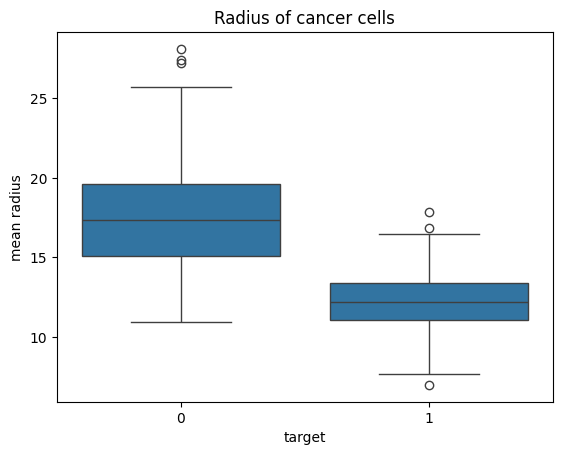

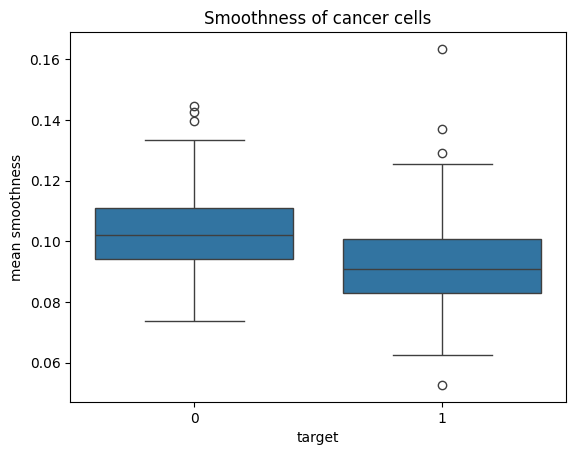

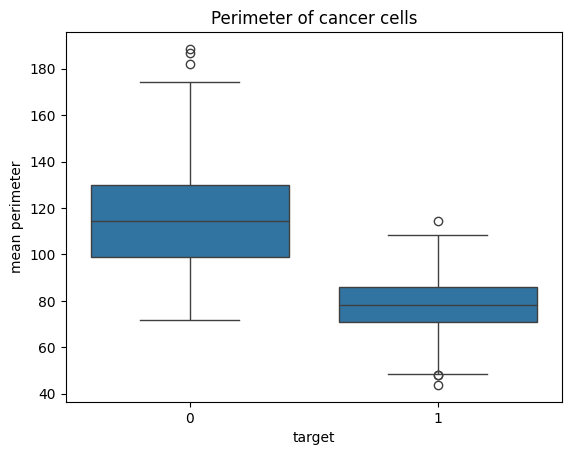

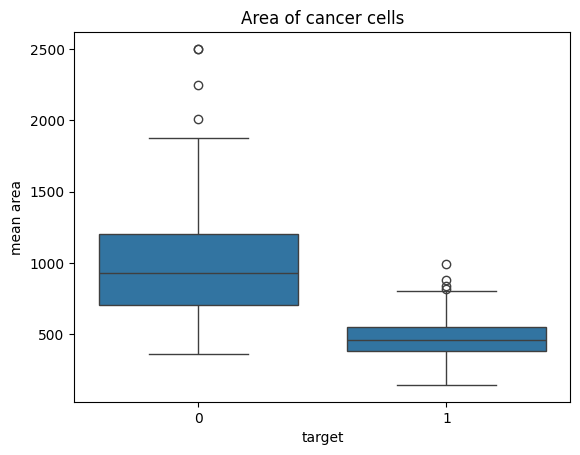

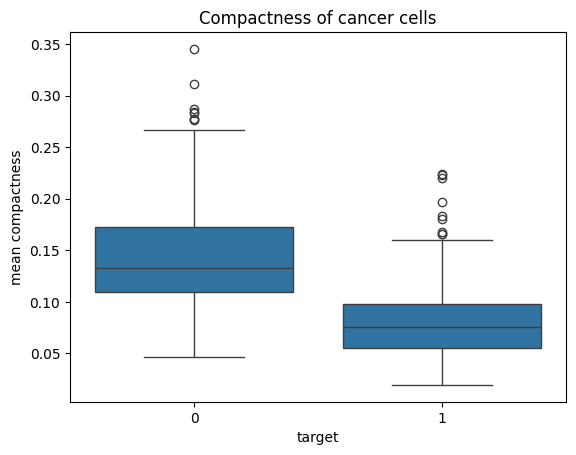

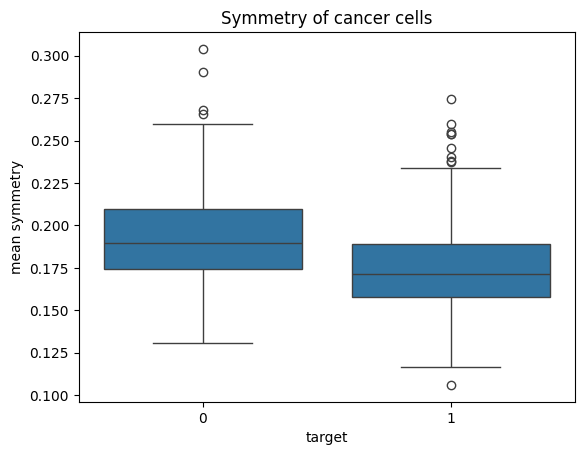

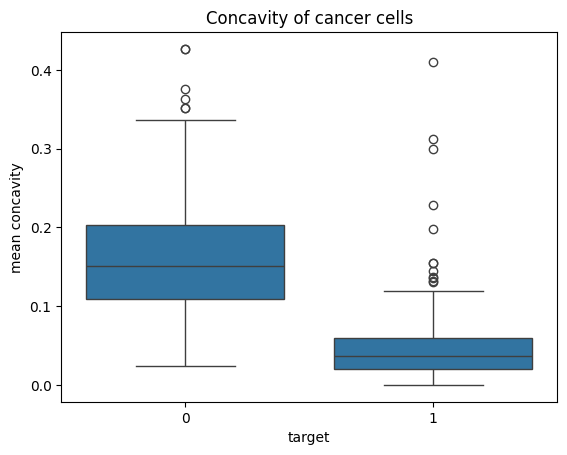

In [51]:
sns.boxplot(x='target', y='mean radius', data=df, )
plt.title("Radius of cancer cells")
plt.show()
print()

sns.boxplot(x='target', y='mean smoothness', data=df, )
plt.title("Smoothness of cancer cells")
plt.show()
print()

sns.boxplot(x='target', y='mean perimeter', data=df, )
plt.title("Perimeter of cancer cells")
plt.show()
print()

sns.boxplot(x='target', y='mean area', data=df, )
plt.title("Area of cancer cells")
plt.show()
print()

sns.boxplot(x='target', y='mean compactness', data=df, )
plt.title("Compactness of cancer cells")
plt.show()
print()


sns.boxplot(x='target', y='mean symmetry', data=df, )
plt.title("Symmetry of cancer cells")
plt.show()
print()


sns.boxplot(x='target', y='mean concavity', data=df, )
plt.title("Concavity of cancer cells")
plt.show()
print()

In [72]:
X = df[['mean radius', 'mean area']]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


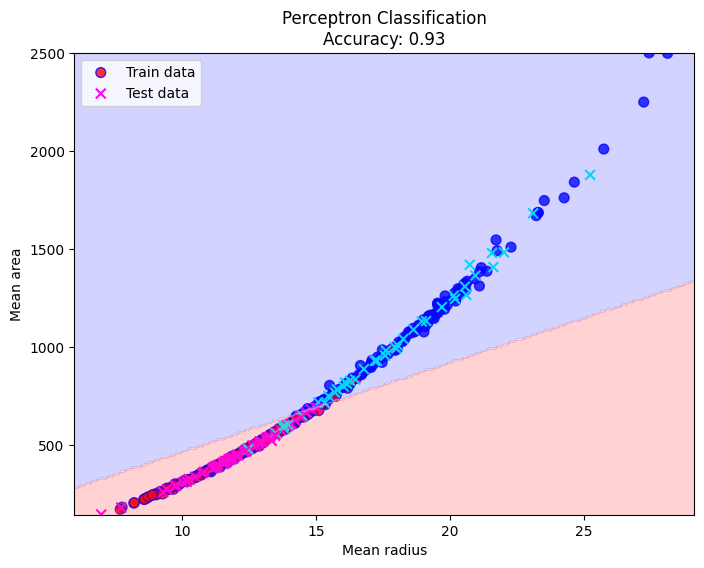

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(X_train['mean radius'], X_train['mean area'], c=y_train, cmap='bwr', edgecolor='b', s=50, alpha=0.8)
plt.scatter(X_test['mean radius'], X_test['mean area'], c=y_test, cmap='cool', marker='x', s=50, label='Test data')

x_min, x_max = X['mean radius'].min() - 1, X['mean radius'].max() + 1
y_min, y_max = X['mean area'].min() - 1, X['mean area'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.xlabel('Mean radius')
plt.ylabel('Mean area')
plt.title(f'Perceptron Classification\nAccuracy: {accuracy:.2f}')
plt.legend(['Train data','Test data'])
plt.show()